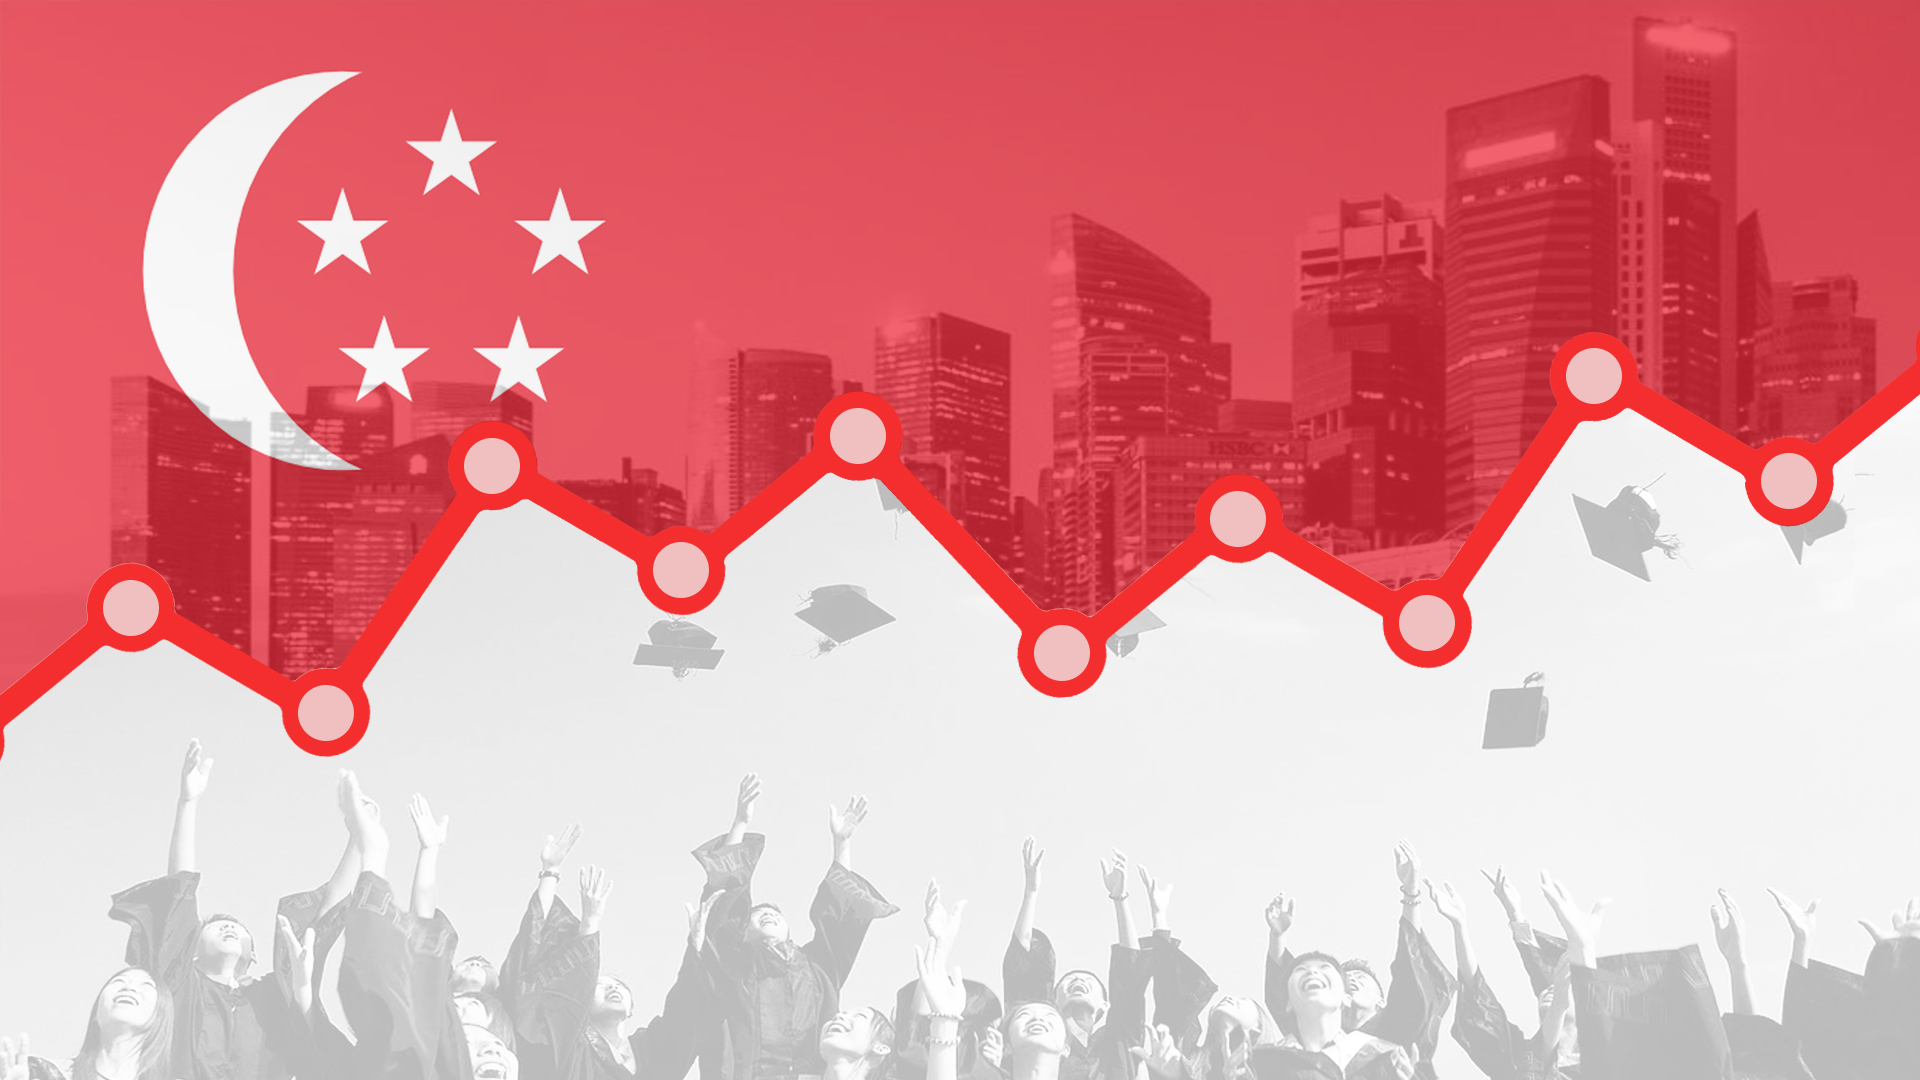

# Graduate Employment in Singapore - A Deep Dive
By: Neelesh Vasnani | 20 December 2020


## - Introduction

Singapore's education system is often regarded as one of the best in the world. The country's world-class education is a primary driver of economic success and employment in the country. This analysis dives deep into the graduate employment in Singapore and investigates the bridge between university education and employability.

The main dataset used for the analysis is the graduate employment survey conducted by the Singapore government. Additional datasets are augmented on top of this dataset to enable deeper analyses and insights. An exploratory data analysis approach is applied through the use of distributions, visualizations, statistical tests, and trends analysis in order to understand the data and uncover insights relating to graduate employment. 

## - Background and Motivation

Over the past few decades, Singapore - often referred to as 'The Little Red Dot" - has rapidly grown to become one of the strongest economies in the world. In the 1960s, Singapore was perceived as a tiny, underdeveloped nation devoid of natural resources. Prospects for any sort of economic growth looked very grim. Beating all odds, the country has since experienced unprecedented and unparalled growth.  In May 2019, Singapore ranked first among the world's most competitive economies (IMD, 2019). It also ranked as the most "Technology-Ready Nation", the first most open and "free" economy in the world, and the third largest economy by GDP per capita in the same year. Although Singapore has evolved into a highly developed uber economy, it consistently reports one of the lowest unemployment rates among developed countries. 

What underpins this meteoric rise has been a perplexing topic of interest for economists around the world. Some experts point to the strategic location of the island while others attribute the nation's success mainly to friendly and efficient government policies. While these are key drivers, it is Singapore's education system that has been the core secret to its success - playing a central role in the development of Singapore's economy. In fact, Singapore is a renowned education hub with one of the best education systems in the world. In a 2016 report by the World Economic Forum, Singapore ranked first for having the best higher education and training structure in the world (Yiannouka, 2015).

Singapore's only "natural resource" is its people which is why the country's government invests a lot in forward-looking education and skill development. According to EHL (2019), the motivation behind this is that education would ultimately drive sustained economic growth through the creation of high-value jobs and highly-skilled knowledge workers.  

Since a highly competitive economy also means a highly competitive job market, how university education translates into employment becomes an important bridge to inspect. For instance, fresh graduates are increasingly finding it difficult to secure their desired jobs because of heightened competition. College students are increasingly challenged by the dilemma of selecting the right universities, degrees, and courses that are most likely to land them job security. Employers across different industries are becoming more concerned about the skill-readiness of fresh graduates. Moreover, Tjin (2019) pointed out that one of the key issues facing Singapore is the pursuit of transforming education to fit the constantly evolving job requirements within a fast-growing economy. These points form a strong and compelling rationale to investigate the graduate employment in Singapore.

This analysis deeps dive into the graduate employment spectrum in Singapore and attempts to address some key issues and questions pertaining to graduate employment as well as uncover useful insights for graduates and employers. A data-driven approach is employed by exploring several datasets sourced from Singapore government agencies including Data.gov.sg and Department of Statistics Singapore. The analysis is mainly hinged on the university graduate employment survey data which is further augmented with supplementary datasets. 

## - Research Questions

In light of the above discussion, this analysis is guided by the following research questions:
 - Is there a significant difference between the mean monthly salaries of graduates of the different public universities in Singapore?
 - How do the different public universities compare in performance in terms of monthly salary and employment rate of graduates?
 - Do graduates from the big three universities (NUS, SMU, NTU) have higher employment rate or higher salaries than overall?
 - What do the course-level and university-level break outs tell us about the favorable universities for each course in terms of salaries and employment rates?
 - How does the supply of graduates match the demand of job vacancies across different courses and industries?
 - Is there a correlation between government expenditure on education and the total student intake? Or a correlation between the number of graduates produced by course, and employment rate?
 - How does gender affect graduate employment? Are there courses under or overrepresented by a certain sex? Are male salaries higher than that of females?
 - What insights can be derived from looking at various year-over-year trends such as salaries, employment rates, job vacancy rates, supply of graduates, government expenditure on education, etc.?

## - Data Cleaning and Preparation

A thorough data preparation and cleaning task is done before proceeding into analysis. This process is essential to ensure accurate results and valid inferences from the analyses. 

### - Importing Modules and Setting Options

In [ ]:
#importing required modules

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
from scipy.stats import f_oneway, ttest_ind, pearsonr, linregress, normaltest

#setting up plotting options

%matplotlib inline
%reload_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = 16,8
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)
palette = sns.color_palette("Reds")

#display options for Pandas

pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)

Setting up some custom functions for efficiency:

In [ ]:
#counting records with at least one null value in a dataset

def rowcountofnull(d):
    return len(d[d.isnull().any(axis=1)].index)

#viewing datatypes, columns, and sample records in a dataset

def quickviewdf(d):
    print("Columns and data types:\n")
    print(d.dtypes, "\n")
    print("Quick Glance at Data Set (1st 2 rows):")
    return d.head(2)

#custom function to add bar labels to bar chart

def snsbarhlabels(snsplt):
    for i, bar in enumerate(snsplt.ax.patches):
        w = bar.get_width()
        snsplt.ax.text(1.05*w,i,'{}'.format(int(w)),ha='center', va='center')

#test for normal distribution

def isnormal(d):
    stat, pvalue = normaltest(d)
    print("Test for Normality Results: Statistic = %g , p-value = %g\n" % (stat, pvalue))
    if p < 0.05:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected - the variable is normally distributed.")
    else:
        print("The null hypothesis cannot be rejected - not enough evidence to claim the variable is normally distributed.")
        
#linear regression function

def linreg(x,y):
    s,i,r,p,e = linregress(x,y)
    print("Linear regression output:", 
          "\n\nEquation: y =", s,"x  + ", i,
          "\nCorrelation coefficient (r): ",r,
          "\np-value", p,
          "\nStandard error:", e)
    
#upper tailed hypothesis test function

def uppertailtest(a,b):
    stat, pvalue = ttest_ind(a,b, equal_var=False)
    print("Upper-tailed Hypothesis Test Results: \n\nStatistic = %g  P-Value = %g" % (stat, pvalue/2))
    if pvalue/2 < 0.05:
        print("Decision: Reject null hypothesis")
    else:
        print("Decision: Failed to reject null hypothesis")

#ANOVA test function

def anova(a,b,c,d,e):
    stat, pvalue = f_oneway(a,b,c,d,e)
    print("ANOVA results: \n\nF-statistic = %g  P-Value = %g" % (stat, pvalue))
    if pvalue < 0.05:
        print("Decision: Reject null hypothesis")
    else:
        print("Decision: Not enough evidence to reject null hypothesis")

### - Importing Data

Importing the required datasets:

All the seven (7) datasets used in this analysis are sourced from Singapore government agencies. The first two datasets will serve as primary datasets for the analysis while the rest will aid in supplementary analysis.  

1. Graduate employment survey data for NTU, NUS, SIT, SMU, SUSS | Source: data.gov.sg
2. Universities' intake, enrolment, and graduates by course, sex, and year | Source: data.gov.sg
3. Reference dataset mapping specific to general courses | Source: custom
4. Employee mean monthly earnings by year, quarter, and sex | Source: data.gov.sg
5. Government expenditure on education by year | Source: data.gov.sg
6. Employment change delta by industry and year | Source: singstat.gov.sg
7. Job vacancy rate by industry and year | Source: data.gov.sg

Based on the metadata, missing values are tagged as 'na' and this is taken into account while importing datasets. 

In [ ]:
#importing data sets into dataframes

#primary datasets for analysis

df_empsurvey = pd.read_csv('../datasets/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv',
                           na_values=['na'], 
                           encoding='latin-1')
df_uni = pd.read_csv('../datasets/universities-intake-enrolment-and-graduates-by-course.csv', 
                     na_values=['na',0])

#secondary datasets for supporting analysis

df_refmap = pd.read_csv('../datasets/specific-to-general-courses-map-reference.csv', 
                        na_values=['na'])
df_earnings = pd.read_csv('../datasets/average-mean-monthly-nominal-earnings-per-employee-by-sex-quarterly.csv', 
                          na_values=['na'])
df_govtexp = pd.read_csv('../datasets/government-expenditure-on-education.csv', 
                         na_values=['na'])
df_empdelta = pd.read_csv('../datasets/employment-change-by-industry-year-singstat.csv', 
                          na_values=['na'])
df_jobvac = pd.read_csv('../datasets/job-vacancy-rate-by-industry-level3.csv', 
                        na_values=['na'])

### - Dealing with Missing Values

Checking the number of records with one or more missing values for each dataset:

In [ ]:
#printing out number of missing values per dataset using custom function

print("Number of records with NaN / missing values for each dataset:\n")
print("df_empsurvey:", rowcountofnull(df_empsurvey)) 
print("df_uni:", rowcountofnull(df_uni))
print("df_refmap:", rowcountofnull(df_refmap))
print("df_earnings:", rowcountofnull(df_earnings)) 
print("df_govtexp:", rowcountofnull(df_govtexp)) 
print("df_empdelta:", rowcountofnull(df_empdelta)) 
print("df_jobvac:", rowcountofnull(df_jobvac))

Number of records with NaN / missing values for each dataset:

df_empsurvey: 82
df_uni: 20
df_refmap: 0
df_earnings: 0
df_govtexp: 0
df_empdelta: 11
df_jobvac: 0


In order to ensure accurate inference from the analysis, missing values must be discarded from the datasets. Interpolation would not help here due to the categorical nature of fields such as course, university, and degree in that numbers can vary greatly between these categories. 

Based on the above check, three datasets "df_empsurvey","df_uni", and "df_empdelta" contain missing values. Records with missing values are dropped from these datasets and a check is done to validate:

In [ ]:
#droping NaN values from datasets

df_empsurvey.dropna(inplace=True)
df_uni.dropna(inplace=True)
df_empdelta.dropna(inplace=True)

#validating if all records with NaN were indeed dropped

print("Number of records with NaN / missing values for the datasets:\n")
print("df_empsurvey:", rowcountofnull(df_empsurvey)) 
print("df_uni:", rowcountofnull(df_uni))
print("df_empdelta:", rowcountofnull(df_empdelta))

Number of records with NaN / missing values for the datasets:

df_empsurvey: 0
df_uni: 0
df_empdelta: 0


### - Checking for Duplicate Values

Checking number of records in the dataset:

In [ ]:
#printing number of rows in each dataset

print("Number of records in each dataset before duplicates are removed:\n")
print("df_empsurvey:", len(df_empsurvey))
print("df_uni:", len(df_uni))
print("df_refmap:", len(df_refmap))
print("df_earnings:", len(df_earnings)) 
print("df_govtexp:", len(df_govtexp)) 
print("df_empdelta:", len(df_empdelta)) 
print("df_jobvac:", len(df_jobvac))

Number of records in each dataset before duplicates are removed:

df_empsurvey: 621
df_uni: 400
df_refmap: 267
df_earnings: 261
df_govtexp: 38
df_empdelta: 18
df_jobvac: 882


Deleting duplicates if any:

In [ ]:
#deleting entire duplicate rows if any

df_empsurvey.drop_duplicates(keep=False,inplace=True)
df_uni.drop_duplicates(keep=False,inplace=True)
df_refmap.drop_duplicates(keep=False,inplace=True)
df_earnings.drop_duplicates(keep=False,inplace=True)
df_govtexp.drop_duplicates(keep=False,inplace=True)
df_empdelta.drop_duplicates(keep=False,inplace=True)
df_jobvac.drop_duplicates(keep=False,inplace=True)

#printing number of rows in each dataset to detect difference

print("Number of records in each dataset after attempt to remove duplicates:\n")
print("df_empsurvey:", len(df_empsurvey))
print("df_uni:", len(df_uni))
print("df_refmap:", len(df_refmap))
print("df_earnings:", len(df_earnings)) 
print("df_govtexp:", len(df_govtexp)) 
print("df_empdelta:", len(df_empdelta)) 
print("df_jobvac:", len(df_jobvac))

Number of records in each dataset after attempt to remove duplicates:

df_empsurvey: 621
df_uni: 400
df_refmap: 267
df_earnings: 261
df_govtexp: 38
df_empdelta: 18
df_jobvac: 882


The number of records did not change after the attempt to remove duplicates. Hence, there were no duplicate rows in the datasets. Only entire row duplicates were tested since the nature of the datasets permits duplicate values within individual columns. 

### - Modifying Data Types

Checking data types of the columns used for analysis and modifying as needed:

Checking df_empsurvey dataset:

In [ ]:
quickviewdf(df_empsurvey)

Columns and data types:

year                           int64
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
dtype: object 

Quick Glance at Data Set (1st 2 rows):


,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701.0,3200.0,3727.0,3350.0,2900.0,4000.0
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850.0,2700.0,2938.0,2700.0,2700.0,2900.0


Everything looks good, no change needed.

Checking df_uni dataset:

In [ ]:
quickviewdf(df_uni)

Columns and data types:

year          int64
sex          object
course       object
intake       object
enrolment    object
graduates    object
dtype: object 

Quick Glance at Data Set (1st 2 rows):


,year,sex,course,intake,enrolment,graduates
0,2005,MF,Accountancy,876,2561,706
1,2005,F,Accountancy,530,1732,495


Cleaning dataset and modifying data types on df_uni dataset:

In [ ]:
#removing commas from numeric columns and changing data type to numeric

df_uni['intake'] = df_uni['intake'].str.replace(',','')
df_uni['enrolment'] = df_uni['enrolment'].str.replace(',','')
df_uni['graduates'] = df_uni['graduates'].str.replace(',','')
df_uni[['intake','enrolment','graduates']] = df_uni[['intake','enrolment','graduates']].apply(pd.to_numeric)
df_uni.dtypes

year          int64
sex          object
course       object
intake        int64
enrolment     int64
graduates     int64
dtype: object

Checking df_refmap dataset:

In [ ]:
quickviewdf(df_refmap)

Columns and data types:

degree    object
course    object
dtype: object 

Quick Glance at Data Set (1st 2 rows):


,degree,course
0,Accountancy,Accountancy
1,Accountancy (3-yr direct Honours Programme),Accountancy


Everything looks good, no change needed.

Checking df_earnings dataset:

In [ ]:
quickviewdf(df_earnings)

Columns and data types:

quarter                     object
sex                         object
average_monthly_earnings     int64
dtype: object 

Quick Glance at Data Set (1st 2 rows):


,quarter,sex,average_monthly_earnings
0,1998-Q1,total,2800
1,1998-Q2,total,2544


Cleaning dataset and modifying data types on df_earnings dataset:

In [ ]:
#renaming "quarter" column to "year" as all analysis is done on annual basis

df_earnings.rename(columns = {'quarter': 'year'}, inplace = True)

#converting "year" column to numeric and removing the quarter suffix

df_earnings['year'] = df_earnings['year'].replace(r'-Q.+', '', regex=True)
df_earnings['year'] = df_earnings['year'].apply(pd.to_numeric)
quickviewdf(df_earnings)

Columns and data types:

year                         int64
sex                         object
average_monthly_earnings     int64
dtype: object 

Quick Glance at Data Set (1st 2 rows):


,year,sex,average_monthly_earnings
0,1998,total,2800
1,1998,total,2544


Checking df_govtexp dataset:

In [ ]:
quickviewdf(df_govtexp)

Columns and data types:

year                              int64
total_expenditure_on_education    int64
dtype: object 

Quick Glance at Data Set (1st 2 rows):


,year,total_expenditure_on_education
0,1981,942517
1,1982,1358430


Everything looks good, no change needed.

Checking df_empdelta dataset:

In [ ]:
quickviewdf(df_empdelta)

Columns and data types:

year                                                 int64
 Total Changes In Employment                         int64
     Goods Producing Industries *                  float64
         Manufacturing                             float64
         Construction                              float64
         Others                                    float64
     Services Producing Industries                 float64
         Wholesale & Retail Trade                  float64
         Transportation & Storage                  float64
         Accommodation & Food Services             float64
         Information & Communications              float64
         Financial & Insurance Services            float64
         Business Services *                       float64
             Real Estate Services                  float64
         Other Services Industries                 float64
             Public Administration & Education     float64
             Health & Social Se

,year,Total Changes In Employment,Goods Producing Industries *,Manufacturing,Construction,Others,Services Producing Industries,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Financial & Insurance Services,Business Services *,Real Estate Services,Other Services Industries,Public Administration & Education,Health & Social Services
11,2002,-22900,-39400.0,-5400.0,-34300.0,300.0,16500.0,-100.0,3600.0,3300.0,-2100.0,-2000.0,1500.0,600.0,12400.0,4200.0,2000.0
12,2003,-12900,-22800.0,-5000.0,-17500.0,-400.0,9900.0,-2300.0,-700.0,1900.0,-2500.0,2200.0,4100.0,-800.0,7100.0,4300.0,1800.0


The data types are good to go, no modifications needed.

Checking df_jobvac dataset:

In [ ]:
quickviewdf(df_jobvac)

Columns and data types:

year                  int64
industry1            object
industry2            object
industry3            object
job_vacancy_rate    float64
dtype: object 

Quick Glance at Data Set (1st 2 rows):


,year,industry1,industry2,industry3,job_vacancy_rate
0,1990,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",4.5
1,1990,manufacturing,textile and wearing apparel,textile and wearing apparel,13.4


The data types are good to go, no modifications needed. 

###  - Checking Distributions for Outliers

Among the several fields across the seven datasets, outliers may be acceptable for most of these fields since they contain values across several years worth of data. For example, if a certain variable experiences high growth trend year over year, outliers are expected. 

However, there are still a number of identified fields in some of the datasets wherein it may be a precautionary course of action to check for outliers and extreme values. Boxplots are used on these fields to check for outliers.

Text(0, 0.5, 'University')

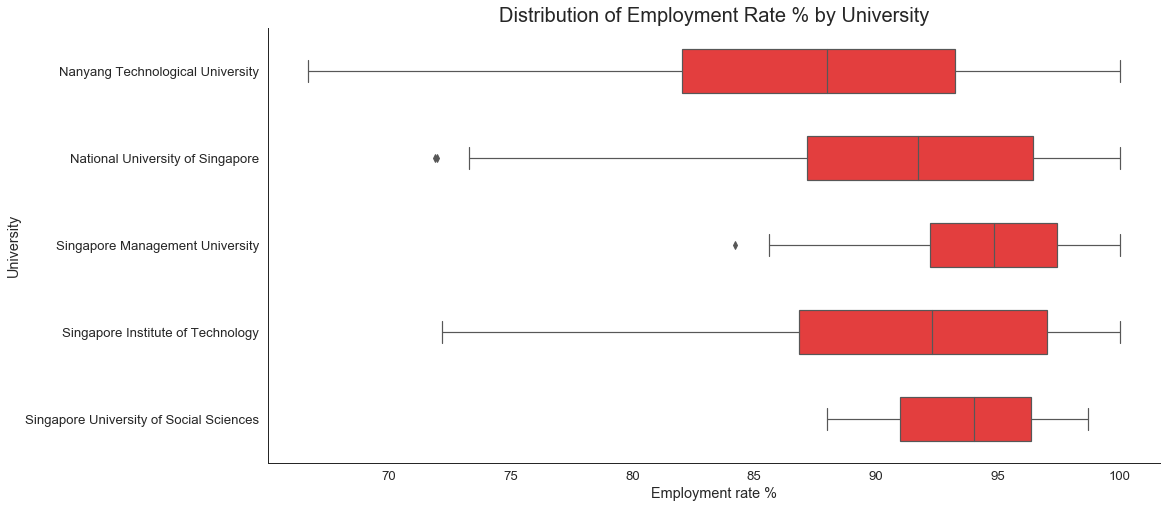

In [ ]:
sns.boxplot(y="university", x="employment_rate_overall", data=df_empsurvey, color = "#ff2222", orient="h", width=0.5)
sns.despine(left=False, bottom=False)
plt.title('Distribution of Employment Rate % by University', fontsize=20)
plt.xlabel('Employment rate %')
plt.ylabel('University')

Based on the boxplot above, the distribution of employment rate (%) from the graduate employment survey dataset contains only 3 outliers. While the boxplot tells us these are outliers, commonsensically they still represent employment rates of over 70% so they can be accepted as non-extreme and non-erroneous values. There are no values above 100% or below 60% which means there is a precise range of data to work with for analysis. 

Text(0, 0.5, 'University')

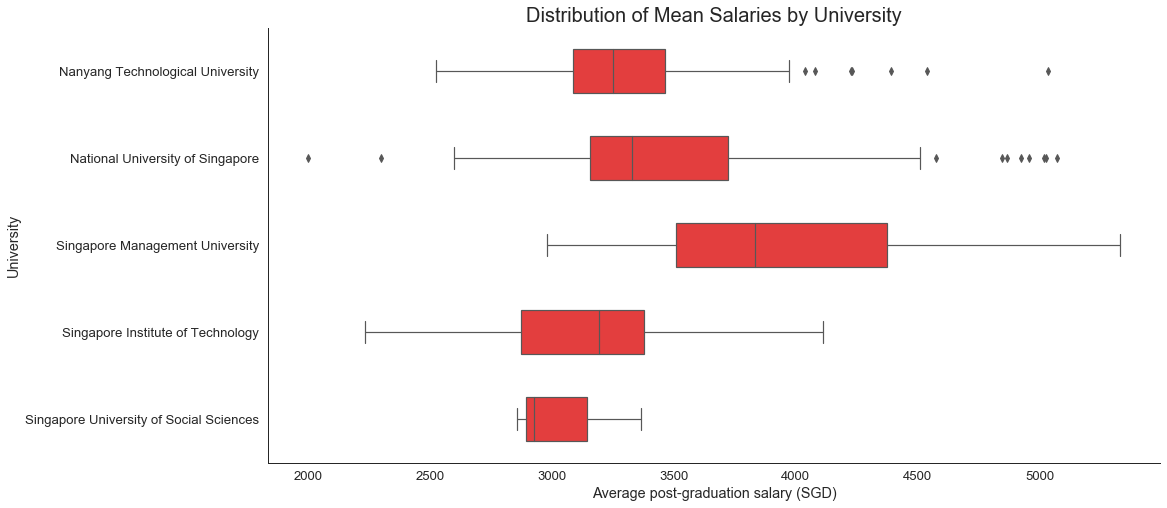

In [ ]:
sns.boxplot(y="university", x="basic_monthly_mean", data=df_empsurvey, color = "#ff2222", orient="h", width=0.5)
sns.despine(left=False, bottom=False)
plt.title('Distribution of Mean Salaries by University', fontsize=20)
plt.xlabel('Average post-graduation salary (SGD)')
plt.ylabel('University')

For the distribution of the mean post-graduation salary, there are a number of outliers detected as seen in the box and whisker plot above. However, these outliers are mainly concentrated in datapoints pertaining to National University of Singapore and Nanyang Technological University. Both these universities are two among the three oldest tertiary institutions in Singapore and thus have a wide variety of courses and degrees as well as more lifetime graduates (UniRank, 2020). This illumnates why a wide range is seen for these two universities. Nonetheless, these outliers are not extreme  or erroneous values as they sit within the SGD 2000 - 5500 range across the board, so they need not be discarded.

In [ ]:
df_empsurvey[['employment_rate_overall','basic_monthly_mean']].describe()

,employment_rate_overall,basic_monthly_mean
count,621.000000,621.000000
mean,90.537842,3398.320451
std,6.924028,506.666664
min,66.700000,2000.000000
25%,86.000000,3098.000000
50%,91.300000,3305.000000
75%,96.200000,3593.000000
max,100.000000,5329.000000


To validate the decision regarding outliers, it would help to also look at the summary statistics printed out above for the  employment rate and monthly mean salary columns. Looking at the min and max values, the employment rate data ranges between 66.7% to 100% while basic monthly mean salary ranges from SGD 2000 to SGD 5329. No extreme values outside these boundaries exist.  

Text(0.5, 0, 'Gender')

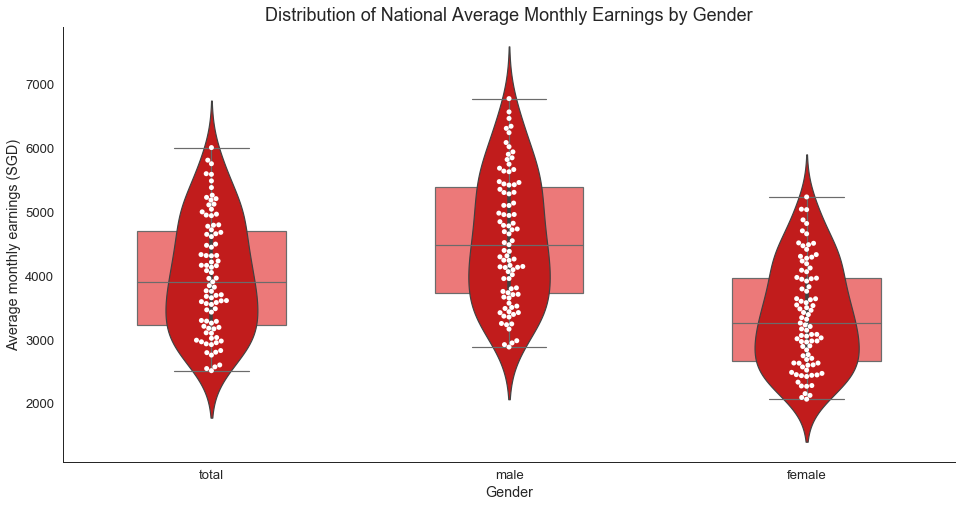

In [ ]:
sns.violinplot( x="sex", y="average_monthly_earnings", data=df_earnings, color="#dd0000", width=0.35)
sns.boxplot( x="sex", y="average_monthly_earnings", data=df_earnings, color="#ff6666", width=0.5)
sns.swarmplot( x="sex", y="average_monthly_earnings", data=df_earnings, color="#ffffff")
sns.despine(left=False, bottom=False)
plt.title('Distribution of National Average Monthly Earnings by Gender', fontsize=18)
plt.ylabel('Average monthly earnings (SGD)')
plt.xlabel('Gender')

In regards to the national average monthly earnings data, there are no outliers detected as shown in the combination plot above. Moreover, the distribution across gender generally follows the same shape. It is also interesting to see at a quick glace that males have may have salaries than females do. This is further explored later in the analysis. 

###  - Preparing and Augmenting Data

The graduate employment survey (df_empsurvey) contains data on employment rate and average monthly salary of the different degrees, schools, and universities in Singapore. A meaningful way to augment this data is to inspect the number of students and graduates for the courses and universities and perhaps examine how this compares with employment rates and salaries. This data is available to us in the (df_uni) dataset which lists the intake, enrolment, and graduates by general course. 

One caveat is that the df_empsurvey data is laid out by specific degree while the df_uni data is categorized by general course category. This means there are no common columns on which the datasets can be merged. 

In order to bridge the two, an external reference map dataset (df_refmap) is used to map specific degrees to general course categories.

In [ ]:
df_empsurvey = pd.merge(df_empsurvey, df_refmap, on='degree', how='left')
df_empsurvey.dropna(inplace=True)
df_empsurvey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 620
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       607 non-null    int64  
 1   university                 607 non-null    object 
 2   school                     607 non-null    object 
 3   degree                     607 non-null    object 
 4   employment_rate_overall    607 non-null    float64
 5   employment_rate_ft_perm    607 non-null    float64
 6   basic_monthly_mean         607 non-null    float64
 7   basic_monthly_median       607 non-null    float64
 8   gross_monthly_mean         607 non-null    float64
 9   gross_monthly_median       607 non-null    float64
 10  gross_mthly_25_percentile  607 non-null    float64
 11  gross_mthly_75_percentile  607 non-null    float64
 12  course                     607 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 6

As seen above, the general course is now added to the graduate employment dataset. This "course" column now serves as a common field between the df_empsurvey and df_uni datasets which will enable meaningful analysis by combining key information from the two datasets.

Finally, some subsets are created from the main datasets in order to make the statistical analysis process on these variables more efficient. 

In [ ]:
#university subsets
NUS = df_empsurvey[df_empsurvey['university']=="National University of Singapore"]
NTU = df_empsurvey[df_empsurvey['university']=="Nanyang Technological University"]
SMU = df_empsurvey[df_empsurvey['university']=="Singapore Management University"]
SIT = df_empsurvey[df_empsurvey['university']=="Singapore Institute of Technology"]
SUSS = df_empsurvey[df_empsurvey['university']=="Singapore University of Social Sciences"]
bigthree = pd.concat([NUS, NTU, SMU])

#gender subsets
earnings_male = df_earnings[df_earnings['sex']=="male"]
earnings_female = df_earnings[df_earnings['sex']=="female"]

## - Analysis Assumptions

All analyses are hinged on the following assumptions:
 - Analysis mainly focuses on post-graduation employment statistics of graduates (about 6 months after graduation based on the metadata) and not overall employment in Singapore.
 - All analysis is carried out on yearly data as apposed to monthly or quarterly. This level of granularity is consistent among datasets and provides a good amount of aggregation for error pooling.  
 - 2020 Data is not included in the analysis for two reasons: (1) incomplete data as of this writing and (2) numbers for 2020 may have been greatly impacted by the pandemic covid-19, which is a one-off factor not applicable to the other years.
 - The mean is used as the default and preferred measure of central tendency for consistency where the number of outliers is small and distribution is normal or symmetric. For variables with skewed distributions, the median is used. 
 - For the graduate employment survey dataset, the "basic_monthly_mean" column is used as a basis for salary data. The mean column is chosen over median column in order to enable valid comparison with the national average earnings dataset which also provides mean salaries. 
 - Where comparison of data is required among variables and across datasets, only data from years 2013 through 2018 is considered for consistency purposes.
 - Observed visual differences in variables do not necessarily indicate statistically significant differences unless tested. Similarly, strong correlations and associations do not necessarily indicate causation. 
 - Red is the preferred color of choice for charts to support the theme of the report. The red color choice does not indicate negative values or downtrends.

## - Exploratory Data Analysis

###  - Distributions

As an initial step in EDA, the distributions of the various variables to be used in analysis are examined. This helps to get a feel of the data and inspect whether any skewness exists.

<b> Average Monthly Salary and Employment Rate: </b>

In the joint plot below, the distributions of the average monthly salary and overall employment rate from the graduate employment survey dataset are generated.

Text(0.5, 0.98, 'Joint Distribution Plot of Employment Rate (%) and Mean Monthly Salary (SGD)')

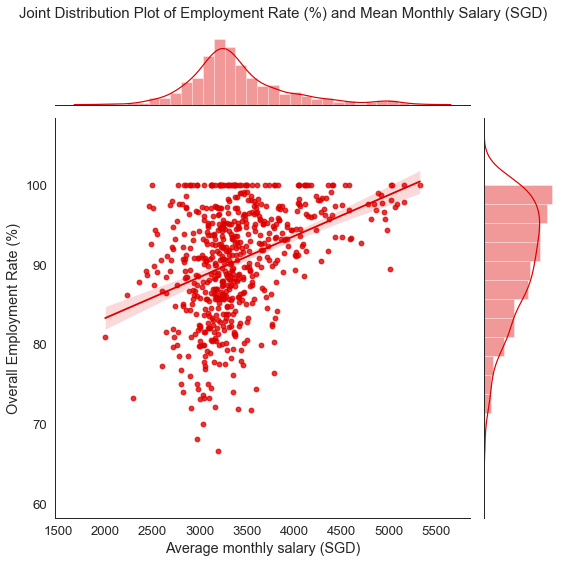

In [ ]:
sns.jointplot( "basic_monthly_mean", "employment_rate_overall", df_empsurvey, kind='reg', height=8,  color="#dd0000");
plt.xlabel('Average monthly salary (SGD)')
plt.ylabel('Overall Employment Rate (%)')
plt.subplots_adjust(top=0.93)
plt.suptitle('Joint Distribution Plot of Employment Rate (%) and Mean Monthly Salary (SGD)', fontsize = 15)

It can immediately be seen from the histogram that the average monthly salary likely follows a normal distribution based on its shape. On the other hand, the overall employment rate seems to be skewed to the right. There also appears to be a moderate positive association between the two, but this must be tested further.

To confirm what the plot shows us, a test for normality is conducted for both variables:

In [ ]:
print("Average Monthly Salary:\n")
isnormal(df_empsurvey['basic_monthly_mean'])
print("\n\nOverall Employment Rate:\n")
isnormal(df_empsurvey['employment_rate_overall'])

Average Monthly Salary:

Test for Normality Results: Statistic = 114.206 , p-value = 1.5867e-25

The null hypothesis can be rejected - the variable is normally distributed.


Overall Employment Rate:

Test for Normality Results: Statistic = 35.2334 , p-value = 2.23441e-08

The null hypothesis can be rejected - the variable is normally distributed.


The variables are normally distributed based on the test and no extreme outliers exist based on the spread of the data, so the mean can be used as the measure of central tendency.

To test if a correlation exists among the two variables, a regression test is conducted:

In [ ]:
linreg(df_empsurvey["basic_monthly_mean"],df_empsurvey["employment_rate_overall"])

Linear regression output: 

Equation: y = 0.005148534437651581 x  +  73.03592547681166 
Correlation coefficient (r):  0.3777668735868991 
p-value 5.022781601090373e-22 
Standard error: 0.0005130344115535434


The r-value is only 0.37 which indicates a weak positive correlation. 

Text(0, 0.5, 'Cumulative Density')

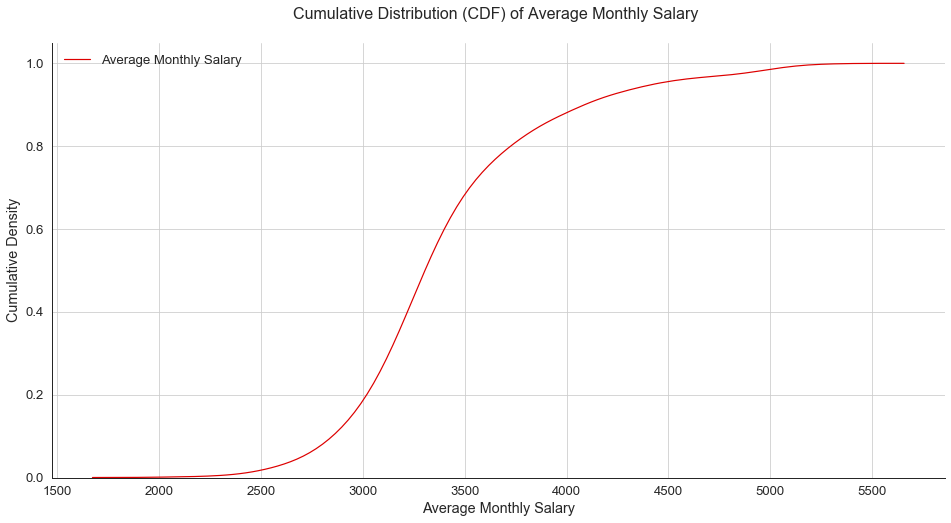

In [ ]:
sns.kdeplot(df_empsurvey['basic_monthly_mean'], cumulative=True, label='Average Monthly Salary', color="#dd0000")
plt.title("Cumulative Distribution (CDF) of Average Monthly Salary \n", size=16)
sns.despine(left=False, bottom=False)
plt.grid(True)
plt.xlabel("Average Monthly Salary")
plt.ylabel("Cumulative Density")

The CDF plot on the average monthly salary of graduates uncovers something interesting not visible in the histogram or kde plot. Several observations can be made regarding the data:
 - 70% of the observations in the survey (i.e. degrees) have an average monthly salary below SGD 3500
 - Half (50%) of the data falls within the SGD 3000 to SGD 3500 range
 - Only a little over 10% of the observations have an average salary of above SGD 4000
 - Only 20% of the data falls below SGD 3000 

Text(0, 0.5, 'Cumulative Density')

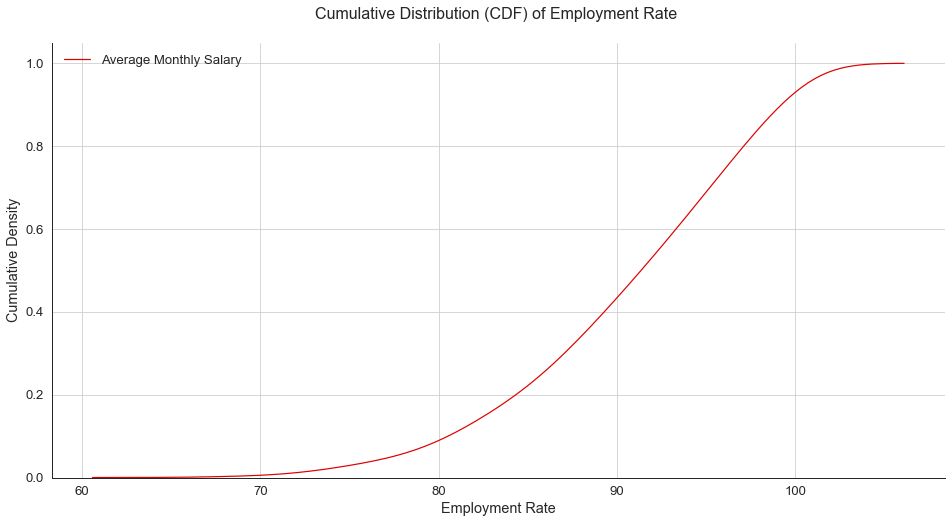

In [ ]:
sns.kdeplot(df_empsurvey['employment_rate_overall'], cumulative=True, label='Average Monthly Salary', color="#dd0000")
plt.title("Cumulative Distribution (CDF) of Employment Rate \n", size=16)
sns.despine(left=False, bottom=False)
plt.grid(True)
plt.xlabel("Employment Rate")
plt.ylabel("Cumulative Density")

The CDF plot on employment rate reveals that 90% of the degrees have employment rates of over 80%. Moreover, around 60% have employment rates of more than 90%.

<b> Number of Graduates: </b>

Next, the distribution of number of graduates is inspected. The bin size for the histogram is computed as the square root of the dataset size.

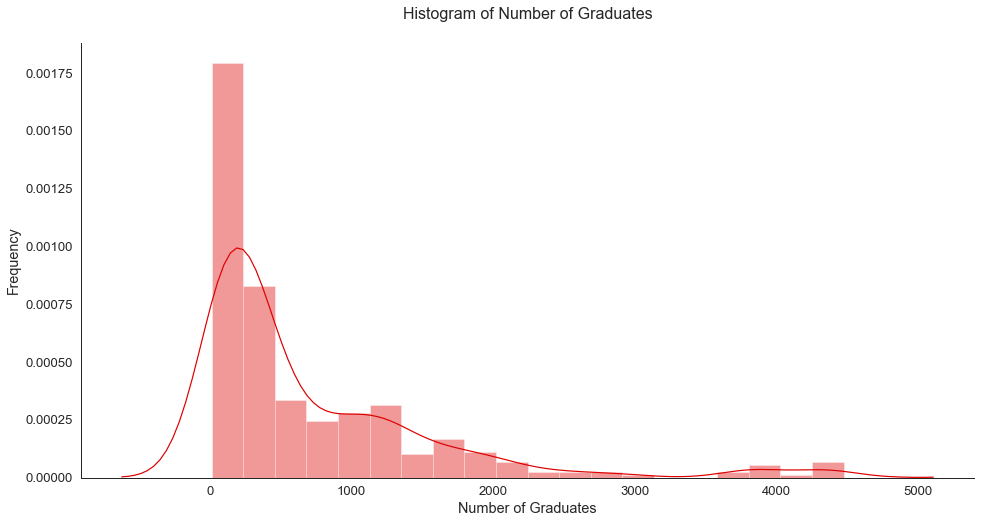

In [ ]:
sns.distplot(df_uni['graduates'], color="#dd0000", hist=True, bins=int(np.sqrt(len(df_uni))))
plt.title("Histogram of Number of Graduates\n", size=16)
plt.xlabel("Number of Graduates")
plt.ylabel("Frequency")
sns.despine(left=False, bottom=False)

The data appears to be relatively skewed to the right. A boxplot can be used to investigate the presence of outliers.

Text(0.5, 0, 'Number of Graduates')

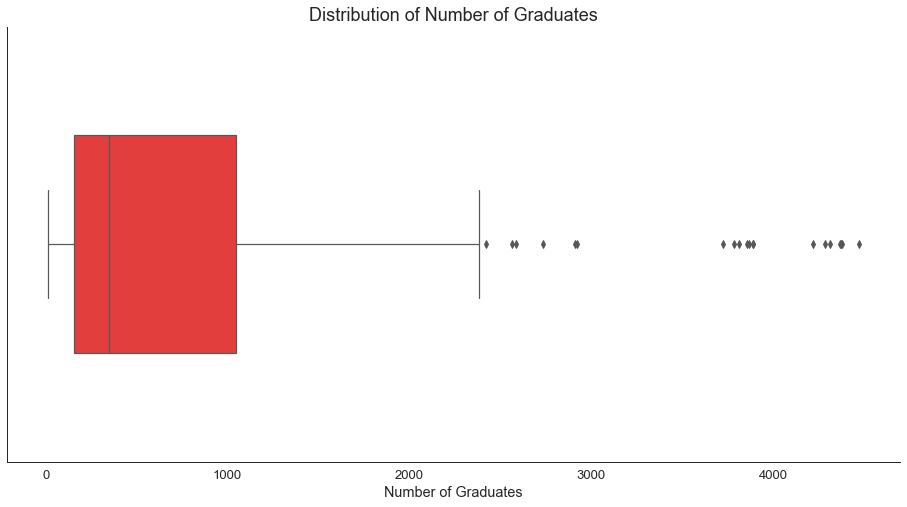

In [ ]:
sns.boxplot(x="graduates", data=df_uni, color = "#ff2222", orient="h", width=0.5)
sns.despine(left=False, bottom=False)
plt.title('Distribution of Number of Graduates', fontsize=18)
plt.xlabel('Number of Graduates')

As seen above, there are a number of outliers detected and the data is skewed to the right. Hence, median would be preferred over mean. It would be meaningful to see if outliers exist within subsets of the data at a course level, since most analysis will be done at that level.

The chart above shows the distributions by course - there is only one outlier. In the previous high-level boxplot, the "engineering sciences" course category must have accounted for most of the outliers since there are relatively much more number of graduates produced for degrees that fall under this course category.

A test for normality indicates normal distribution for the number of graduates.

<b>Job Vacancy Rate: </b>

Next, the distribution of job vacancy rates across specific industries is examined.

In [ ]:
isnormal(df_jobvac['job_vacancy_rate'])

Test for Normality Results: Statistic = 324.046 , p-value = 4.30759e-71

The null hypothesis can be rejected - the variable is normally distributed.


The distribution of job vacancy rates appears to be slightly skewed to the right. It is evident that most of the job vacancy rate % data falls between the 2% and 4% range. The normality test reveals the variable is normally distributed. 

Text(0, 0.5, 'Industry')

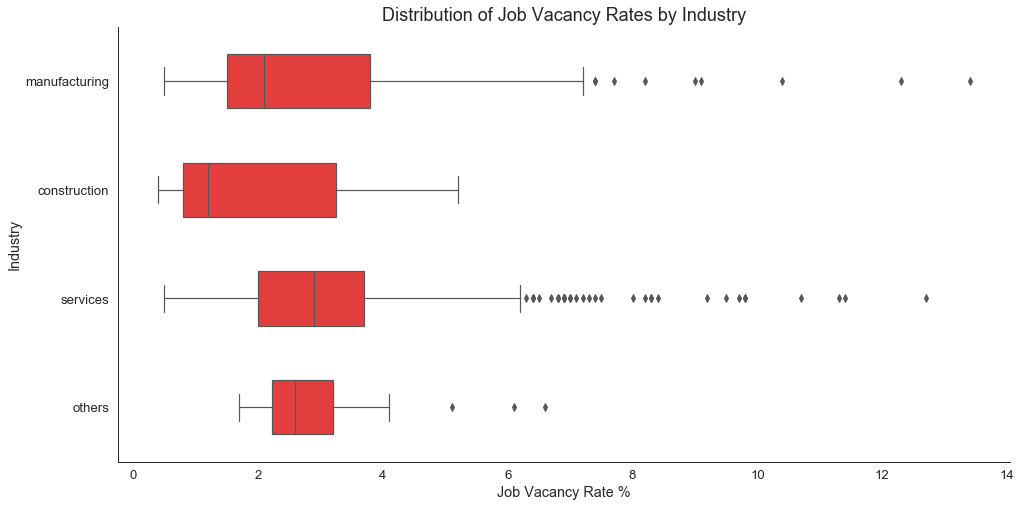

In [ ]:
sns.boxplot(y = "industry1", x="job_vacancy_rate", data=df_jobvac, color = "#ff2222", orient="h", width=0.5)
sns.despine(left=False, bottom=False)
plt.title('Distribution of Job Vacancy Rates by Industry', fontsize=18)
plt.xlabel('Job Vacancy Rate %')
plt.ylabel('Industry')

At an industry level, the boxplot still indicates a skewed distribution and reveals a number of outliers.  As such, the median may be more appropriate for analysis. 

The boxplot also shows that job vacancies are highest in the services sector, followed by manufacturing and construction. It is also notable that while the manufacturing industry has a lower median than services, it has a much wider spread in terms of min and max values. 

<b>National Average Monthly Earnings: </b>

Next, the histogram below shows the distribution of national average monthly earnings.

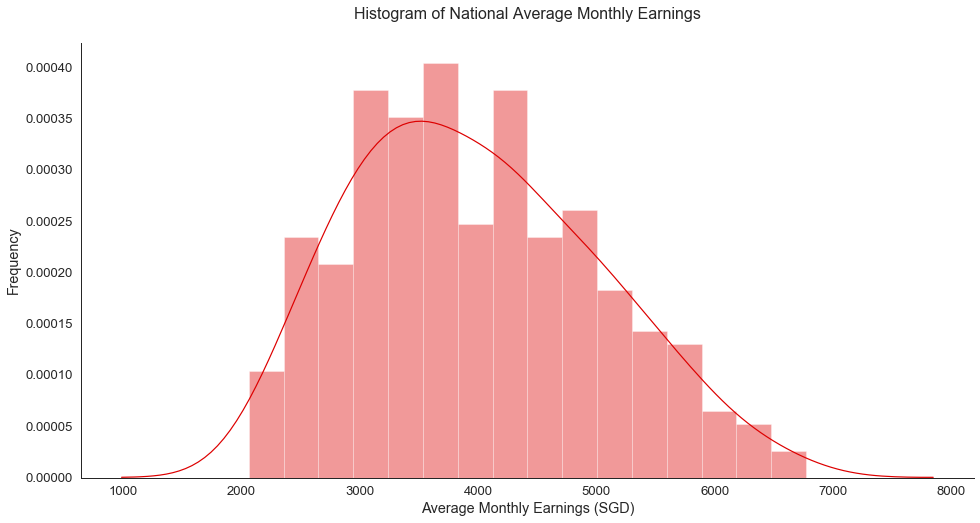

In [ ]:
sns.distplot(df_earnings['average_monthly_earnings'], color="#dd0000", hist=True, bins=int(np.sqrt(len(df_earnings))))
plt.title("Histogram of National Average Monthly Earnings\n", size=16)
plt.xlabel("Average Monthly Earnings (SGD)")
plt.ylabel("Frequency")
sns.despine(left=False, bottom=False)

In [ ]:
isnormal(df_earnings['average_monthly_earnings'])

Test for Normality Results: Statistic = 11.2411 , p-value = 0.00362269

The null hypothesis can be rejected - the variable is normally distributed.


Similar to the average monthly salary of graduates, the national average monthly earnings also follows a symmetric normal distribution. 

Text(0.5, 0, 'National Average Monthly Earnings (SGD)')

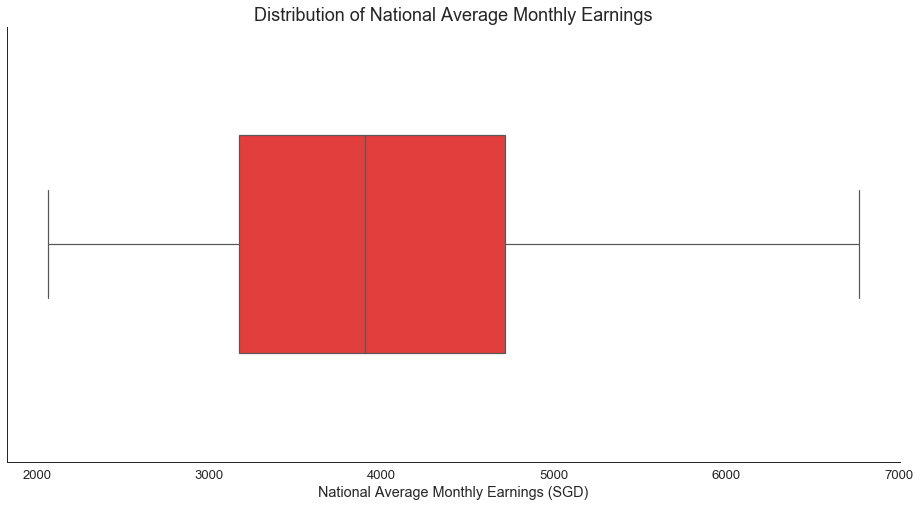

In [ ]:
sns.boxplot(x="average_monthly_earnings", data=df_earnings, color = "#ff2222", orient="h", width=0.5)
sns.despine(left=False, bottom=False)
plt.title('Distribution of National Average Monthly Earnings', fontsize=18)
plt.xlabel('National Average Monthly Earnings (SGD)')

The boxplot shows that the median monthly salary at a national level is roughly around SGD 4000. The data ranges from SGD 2000 to 7000, but most of the data falls between SGD 3200 and SGD 4800. In addition, no outliers are detected for this variable. Hence, the mean can be used as a measure of central tendency for this variable.

<b>Government Expenditure on Education: </b>

Next, the distribution for total government expenditure is examined through a histogram and boxplot.

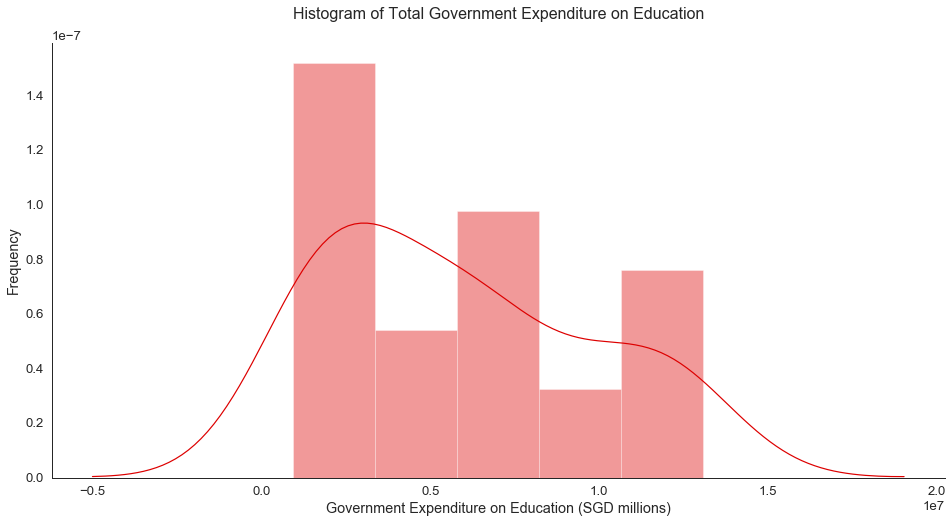

In [ ]:
sns.distplot(df_govtexp['total_expenditure_on_education'], color="#dd0000", hist=True, bins=5)
plt.title("Histogram of Total Government Expenditure on Education\n", size=16)
plt.xlabel("Government Expenditure on Education (SGD millions)")
plt.ylabel("Frequency")
sns.despine(left=False, bottom=False)

Text(0.5, 0, 'Government Expenditure on Education (SGD millions)')

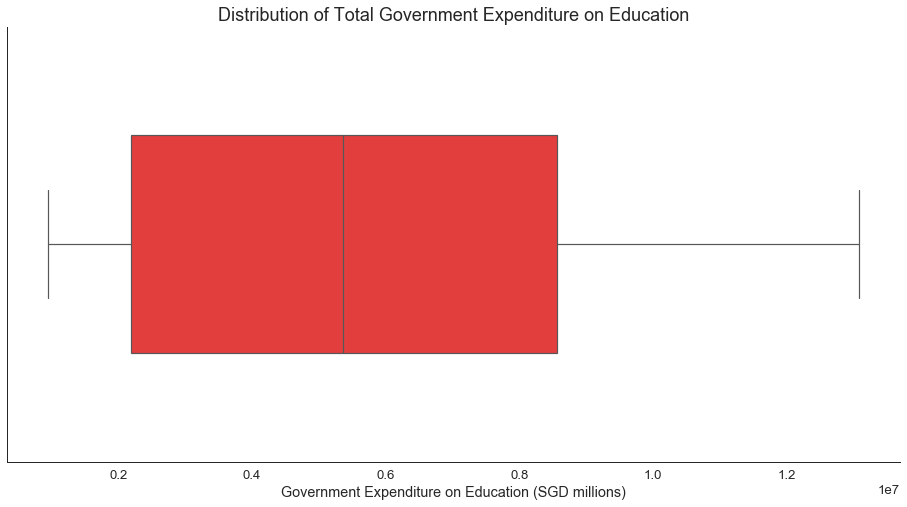

In [ ]:
sns.boxplot(x="total_expenditure_on_education", data=df_govtexp, color = "#ff2222", orient="h", width=0.5)
sns.despine(left=False, bottom=False)
plt.title('Distribution of Total Government Expenditure on Education', fontsize=18)
plt.xlabel('Government Expenditure on Education (SGD millions)')

In [ ]:
isnormal(df_govtexp['total_expenditure_on_education'])

Test for Normality Results: Statistic = 6.90014 , p-value = 0.0317434

The null hypothesis can be rejected - the variable is normally distributed.


The boxplot shows that the median government expenditure on education is around SGD 550,000 per year. For this variable, the histogram and boxplot reveal a fairly normal distribution with no outliers. The mean can be used as a measure of central tendency.

<b>Total Changes in Employment: </b>

Lastly, the distribution for total employment change (delta) is inspected.

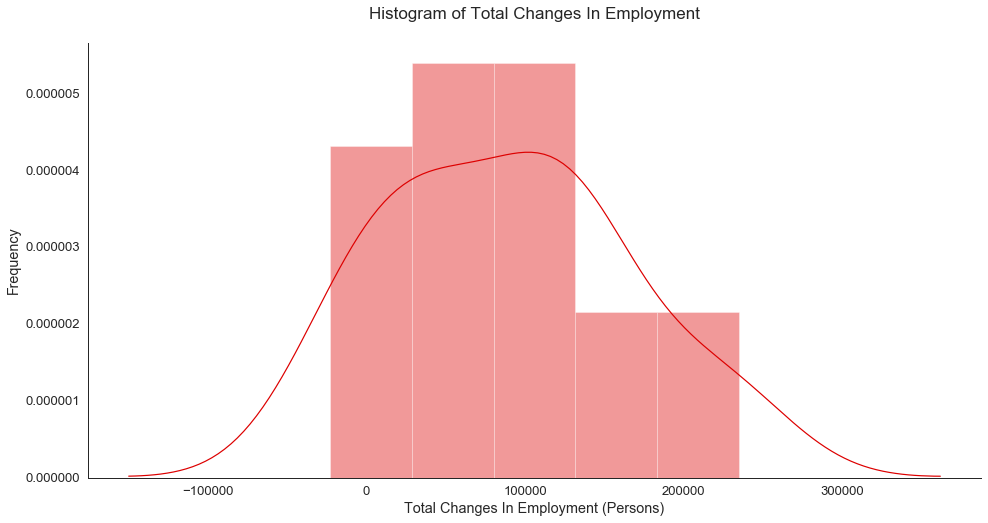

In [ ]:
sns.distplot(df_empdelta[' Total Changes In Employment '], color="#dd0000", hist=True, bins=5)
plt.title("Histogram of Total Changes In Employment\n", size=17)
plt.xlabel("Total Changes In Employment (Persons)")
plt.ylabel("Frequency")
sns.despine(left=False, bottom=False)

Text(0.5, 0, 'Total Changes In Employment (Persons)')

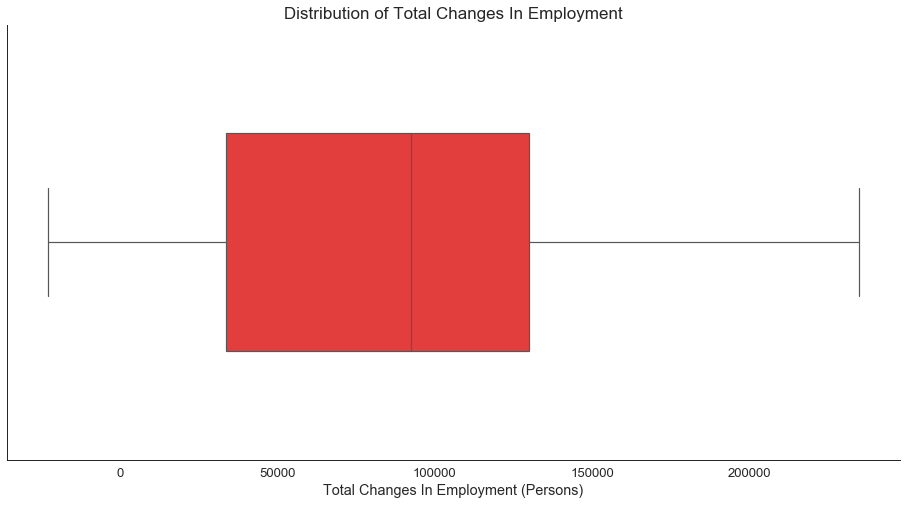

In [ ]:
sns.boxplot(x=" Total Changes In Employment ", data=df_empdelta, color = "#ff2222", orient="h", width=0.5)
sns.despine(left=False, bottom=False)
plt.title('Distribution of Total Changes In Employment', fontsize=17)
plt.xlabel('Total Changes In Employment (Persons)')

In [ ]:
isnormal(df_govtexp['total_expenditure_on_education'])

Test for Normality Results: Statistic = 6.90014 , p-value = 0.0317434

The null hypothesis can be rejected - the variable is normally distributed.


The distribution reveals that the median change in employment is around 100,000 persons. This number can also be negative if employment decreases. As such, this large positive delta value shows that employment is generally increasing in Singapore. This coincides with the consistent GDP growth in the country as there is usually an association between the two (Romano, 2020). 

The variable also appears to have a normal distribution and a symmetric shape to it. The boxplot does not reveal any outliers. The mean can be used here as an estimator.

<b>Summary: </b>
Based on the distributions of each variable, the following measures of central tendency will be preferred during aggregation and analysis.
 - Average post-graduation monthly salary (SGD) - mean
 - Overall employment rate (%) - median
 - Number of graduates - median, sum
 - Total student intake - median, sum
 - Government expenditure on education - mean
 - Job vacancy rate (%) - median
 - Total changes in employment - mean
 - National average monthly earnings - mean

###  - Visualizations and Insights

The graduate employment survey was conducted on graduates of the major public universities in Singapore. The visualization below shows the average monthly salary of graduates broken down by university.

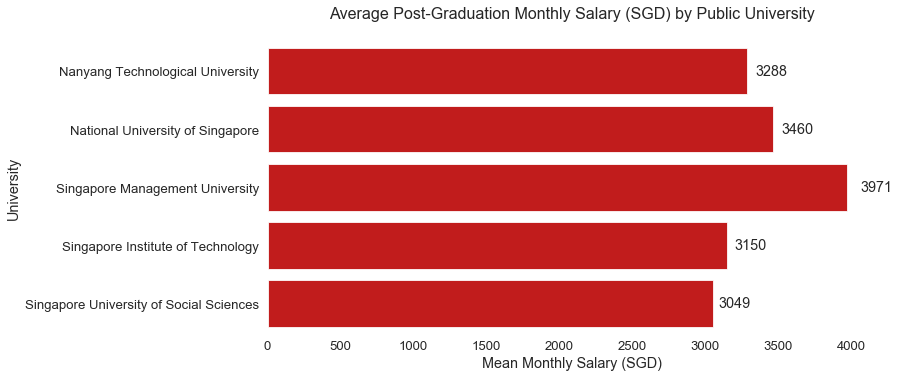

In [ ]:
plot = sns.catplot(y="university", x="basic_monthly_mean", estimator=np.mean,
            data=df_empsurvey,height=5, aspect=2.5/1, kind="bar", orient = "h", color = "#dd0000", ci=None)
sns.despine(left=True, bottom=True)
plt.xlabel("Mean Monthly Salary (SGD)")
plt.ylabel("University")
plt.title("Average Post-Graduation Monthly Salary (SGD) by Public University\n", size=16)
snsbarhlabels(plot)

From the chart, it is clear, at least visually, that there is a difference in the monthly salaries of graduates from the different universities. SMU graduates command the highest monthly salary at SGD 3971 while SUSS graduates had the smallest post-graduation salary at SGD 3049. 

In [ ]:
print("Overall average monthly salary: SGD", df_empsurvey.basic_monthly_mean.mean())

Overall average monthly salary: SGD 3395.1515650741353


The overall average salary was SGD 3395. Only SMU and NUS graduates had a mean salary higher than this average while the other three universities scored below this mean. 

To validate what the visualization shows us, it would help to conduct a statistical test to determine if there is a statistically significant difference among the mean salaries of the different universities. Since the distribution was found to be normal in the previous section, it is safe to use ANOVA to check for differences.

<b> ANOVA Test: </b>
 - Ho: There is no difference in the mean monthly salaries of the different universities (SMU, NUS, NTU, SUSS, SIT).
 - Ha: Not all of the means are same across the five different universities.

In [ ]:
anova(NUS.basic_monthly_mean, 
      NTU.basic_monthly_mean, 
      SMU.basic_monthly_mean, 
      SIT.basic_monthly_mean, 
      SUSS.basic_monthly_mean)

ANOVA results: 

F-statistic = 43.9884  P-Value = 2.09321e-32
Decision: Reject null hypothesis


The test yields a p-value of less than 0.05, so we can reject the null hypothesis and conclude that there is indeed a difference among the mean monthly salaries of the different universities. This insight is valuable to incoming college students in deciding their university of choice. 

Perhaps more useful is digging deeper into this insight at a course-level since students are likely more concerned about the salaries and employment rates for their specific course of choice. The plot below shows the average monthly salary by course. 

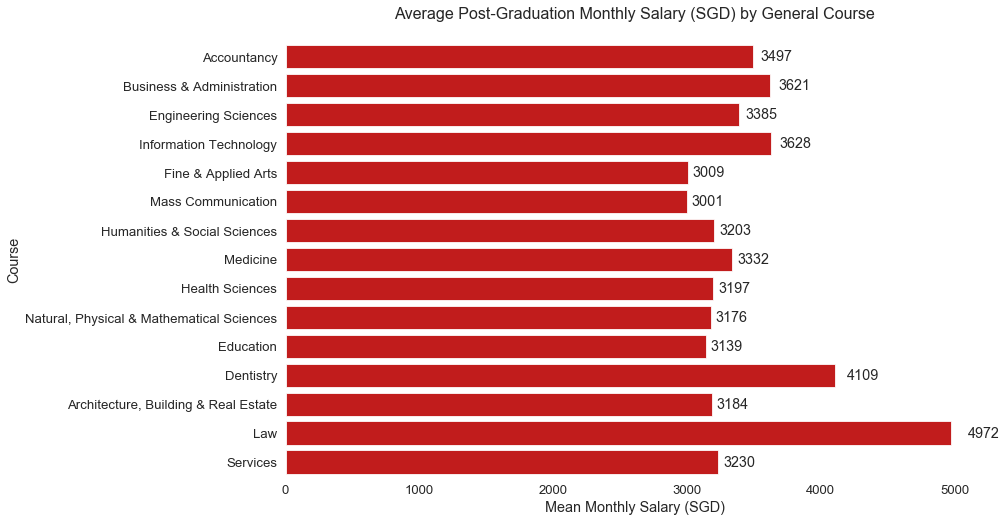

In [ ]:
plot = sns.catplot(y="course", x="basic_monthly_mean", estimator=np.mean, data=df_empsurvey,
                   height=7, aspect=2/1, kind="bar",
                   orient = "h", color = "#dd0000", ci=None)
sns.despine(left=True, bottom=True)
plt.xlabel("Mean Monthly Salary (SGD)")
plt.ylabel("Course")
plt.title("Average Post-Graduation Monthly Salary (SGD) by General Course\n", size=16)
snsbarhlabels(plot)

The chart shows that the average salaries for Law and Dentistry graduates outshine the other courses significantly. This could be because of a small sample size, which is worth looking at:

In [ ]:
print("Sample size for Dentistry: ", len(df_empsurvey[df_empsurvey['course']=="Dentistry"]))
print("Sample size for Law: ", len(df_empsurvey[df_empsurvey['course']=="Law"]))

Sample size for Dentistry:  6
Sample size for Law:  18


Indeed, the sample sizes for dentistry and law are relatively small. Outside these two courses, Accountancy, Business, IT, and Engineering graduates had the highest salaries.

In [ ]:
print("Sample size for Accountancy: ", len(df_empsurvey[df_empsurvey['course']=="Accountancy"]))
print("Sample size for Business & Administration: ", len(df_empsurvey[df_empsurvey['course']=="Business & Administration"]))
print("Sample size for Engineering Sciences: ", len(df_empsurvey[df_empsurvey['course']=="Engineering Sciences"]))
print("Sample size for Information Technology: ", len(df_empsurvey[df_empsurvey['course']=="Information Technology"]))

Sample size for Accountancy:  26
Sample size for Business & Administration:  73
Sample size for Engineering Sciences:  171
Sample size for Information Technology:  55


The averages of these four courses are more reliable, owing to the larger sample sizes.

Even more interesting to a potential student would be information regarding how the different courses compare across the universities. To uncover this insight, the average monthly salary is plotted by course and university in a cross-tabulated heatmap.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

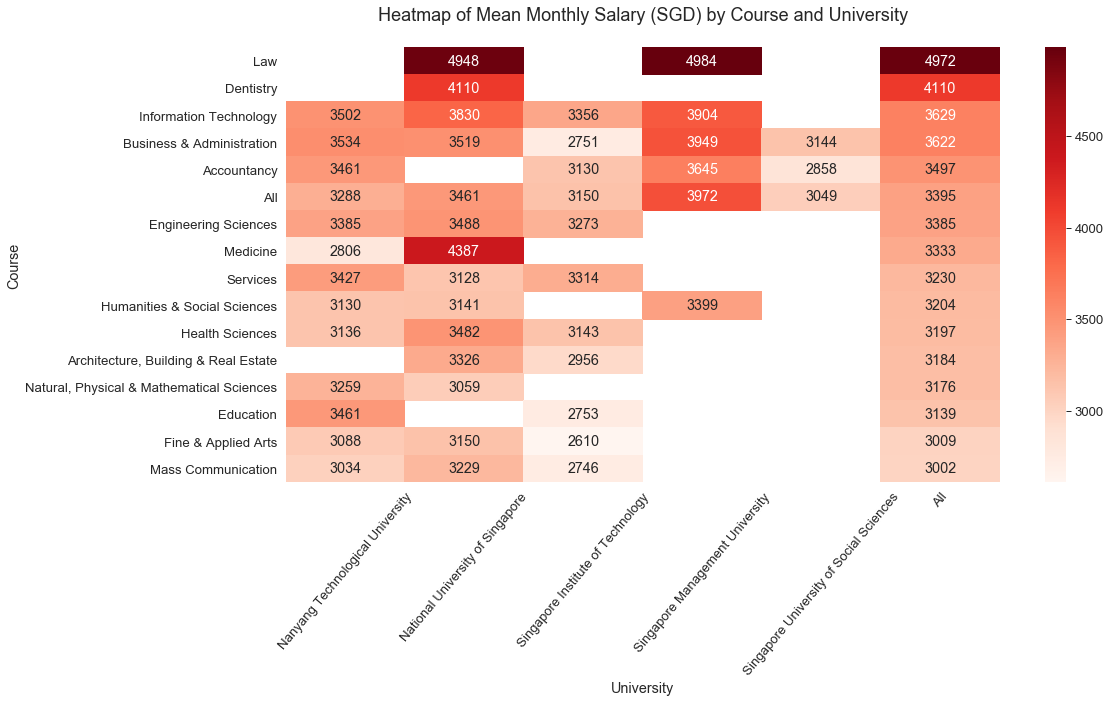

In [ ]:
unicourse = df_empsurvey.pivot_table(values='basic_monthly_mean', 
                index=['course'], columns='university', aggfunc='mean', margins=True).sort_values(
                by = ['All'],ascending=False)
sns.heatmap(unicourse, cmap="Reds", annot=True, fmt='.0f')
plt.xlabel("University")
plt.ylabel("Course")
plt.title("Heatmap of Mean Monthly Salary (SGD) by Course and University\n", size=18)
plt.xticks(rotation=50)

This chart is powerful in that it reveals several insights simultaneously. For instance, one can quickly tell what are the best universities for a certain course or what are the best courses for each university as far as post-graduation salary is concerned. 
 - Overall, SMU and NUS have the most number of boxes in darker red which means they have the highest post-graduation salary for a number of the courses.
 - SMU has the highest average monthly salary overall. However, this is because it is a university that mainly offers business and IT courses and these courses tend to pay more in general, as evidenced by their position at the top of the heatmap. For business, accountancy, and IT aspirants, SMU is the best choice. 
 - For medicine and dentistry aspirants, NUS seems to be the clear winner.
 - For law aspirants, SMU or NUS are equally promising. 
 - Graduates of degrees under education, fine arts, and mass communication are paid the lowest.
 - NUS is particularly successful in its Medicine, Law, IT, and Dentistry courses.

The chart also shows that NTU, NUS, and SMU have more dark red cells in general compared to SIT and SUSS. These three universities are often referred to the "Big 3" public universities in Singapore. As such it would be interesting to see statistically if graduates from these "Big three" universities command higher salaries than overall. A hypothesis test is conducted to determine this:

<b> Upper-Tailed Hypothesis Test: </b>
 - Ho: The mean monthly salary of graduates from the big three universities (NUS, SMU, NTU) is the same as other universities.
 - Ha: The mean monthly salary of graduates from the big three universities (NUS, SMU, NTU) is higher than other universities. 

In [ ]:
uppertailtest(bigthree.basic_monthly_mean, df_empsurvey.basic_monthly_mean)

Upper-tailed Hypothesis Test Results: 

Statistic = 2.29779  P-Value = 0.01089
Decision: Reject null hypothesis


The p-value of 0.01089 is less than 0.05, which means there is enough evidence to support the hypothesis that the graduates from the big three universities are indeed paid higher salaries.

In addition to the average monthly salary, another useful indicator is the overall employment rate of the universities and courses. For instance, some students may be more concerned about employability and job security than salary in which case employment rate (six months post graduation) becomes a more useful statistic.

A similar heatmap as above is generated for the overall employment rate:

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

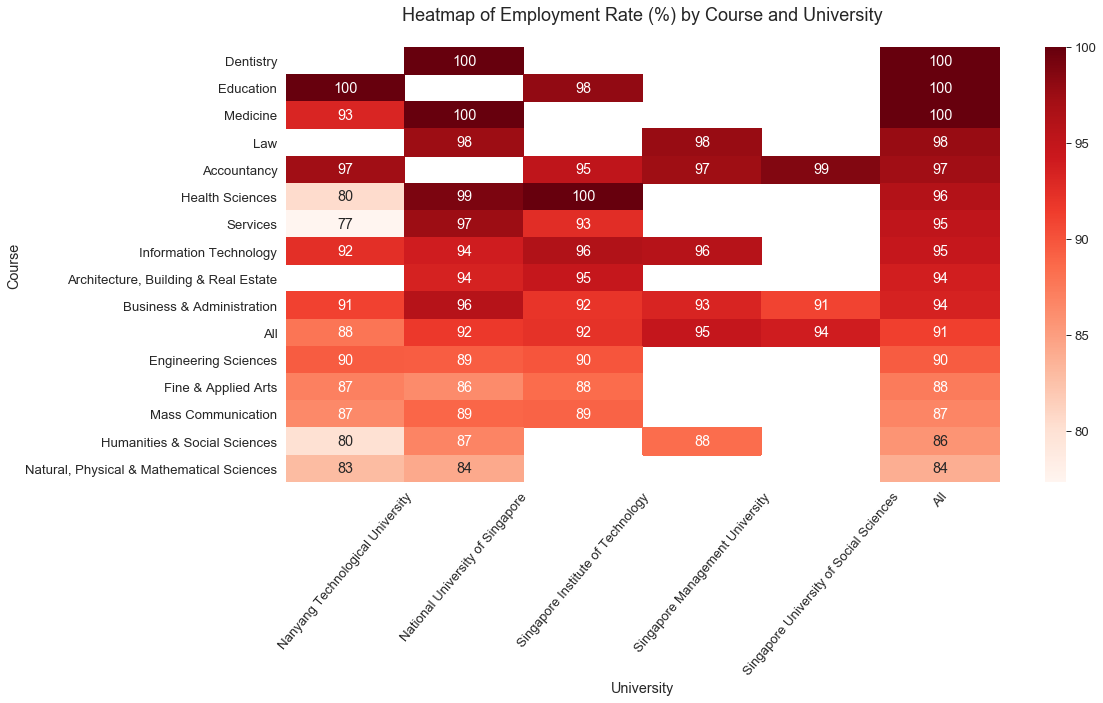

In [ ]:
unicourse = df_empsurvey.pivot_table(
                values='employment_rate_overall', 
                index=['course'], columns='university', aggfunc='median', margins=True).sort_values(
                by = ['All'],ascending=False)
sns.heatmap(unicourse, cmap="Reds", annot=True, fmt='.0f')
plt.xlabel("University")
plt.ylabel("Course")
plt.title("Heatmap of Employment Rate (%) by Course and University\n", size=18)
plt.xticks(rotation=50)

The heatmap for employment rate reveals several insights:
 - Medicine, Dentistry, Education, Law, and Accountancy have the highest employment rates overall. 
 - Degrees under education had the third lowest average salary but this heatmap reveals that education has one of the highest employment rates. This can be attributed to high demand of jobs in the education sector given Singapore's highly nuanced education sector (Tjin, 2019).
 - Overall median employment rate in Singapore is 91%. SMU has the highest employment rate at 95%, followed by SUSS at 94%, NUS and SIT at 92%, and NTU at 88%. 
 - Natural, physical & mathematical sciences, humanities and social sciences, and mass comunication had the lowest employment rates.
 - For business courses, NUS has the highest employment rate at 96% - higher than that of SMU. For accountancy courses, SMU and SUSS have the highest employment rates.
 - For law, SMU and NUS are most promising in terms of median employment rates. This is consistent with the findings from the salary heatmap. 
 - For IT, SMU and SIT have the highest employment rates.
 
An important angle of inquiry when investigating employment prospects is to look at whether the different universities differ in terms of employment rates. To determine this, an ANOVA test is conducted.

<b> ANOVA Test: </b>
 - Ho: There is no difference in the median employment rates of the different universities (SMU, NUS, NTU, SUSS, SIT).
 - Ha: Not all of the median employment rates are the same across the five different universities.

In [ ]:
anova(NUS.employment_rate_overall, 
      NTU.employment_rate_overall, 
      SMU.employment_rate_overall, 
      SIT.employment_rate_overall, 
      SUSS.employment_rate_overall)

ANOVA results: 

F-statistic = 16.5118  P-Value = 7.57842e-13
Decision: Reject null hypothesis


The test yields a p-value of less than 0.05, so we can reject the null hypothesis and conclude that there is indeed a difference among the median employment rates of the different universities. A statistically significant difference implies that students concerned about post graduation employment rates can rely on this information to make an informed decision regarding university choice.

It was previously noted that the graduates from the big three universities have higher average salaries than other universities. To see if this is also the case for employment rates, a hypothesis test is conducted:

<b> Upper-Tailed Hypothesis Test: </b>
 - Ho: The median employment rate of graduates from the big three universities (NUS, SMU, NTU) is the same as other universities.
 - Ha: The median employment rate of graduates from the big three universities (NUS, SMU, NTU) is higher than other universities. 

In [ ]:
uppertailtest(bigthree.employment_rate_overall, df_empsurvey.employment_rate_overall)

Upper-tailed Hypothesis Test Results: 

Statistic = -0.828026  P-Value = 0.203927
Decision: Failed to reject null hypothesis


Based on the hypothesis test, there is not enough evidence to conclude that the big three universities have higher employment rates than overall. While the test for average salary was statistically significant, this is not the case for employment rates.

Text(0.5, 0.98, 'Employment Rate (%) vs Average Monthly Salary Scatterplot by Course\n')

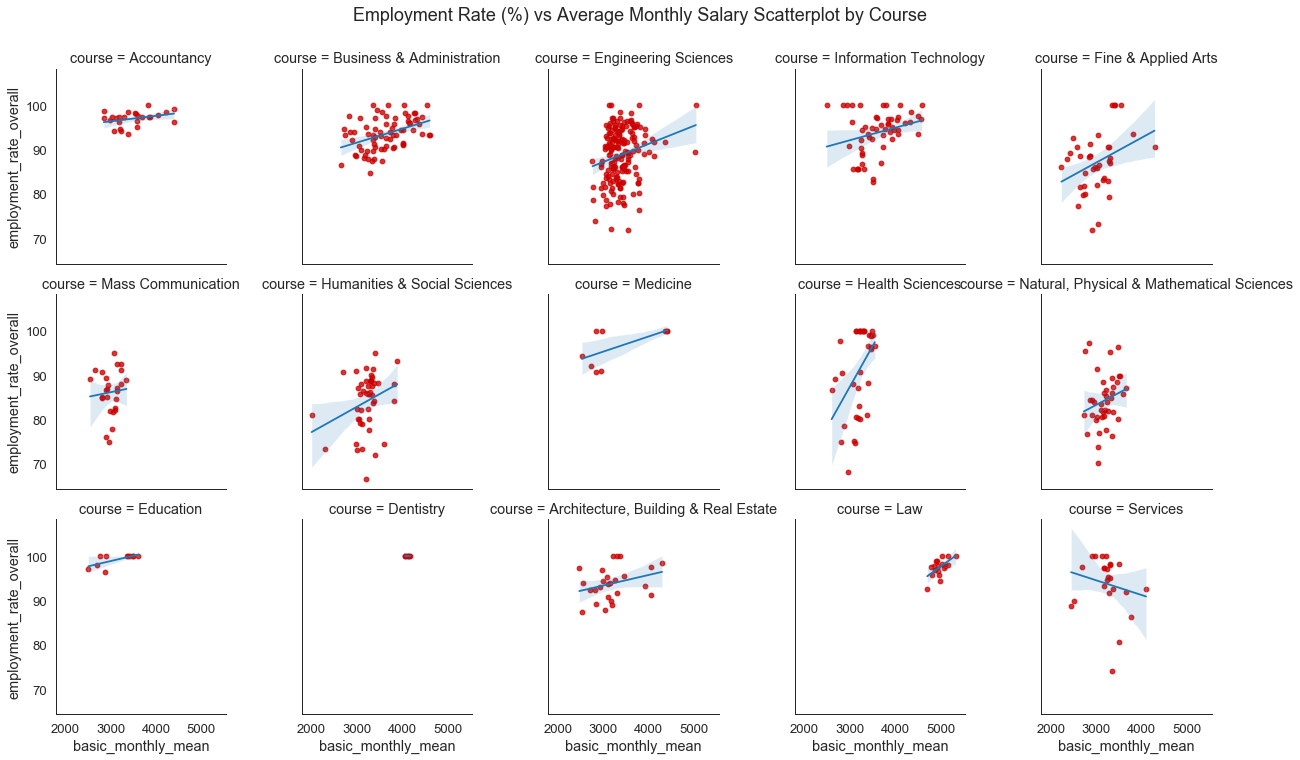

In [ ]:
sns.lmplot(x='basic_monthly_mean', y='employment_rate_overall', 
           data=df_empsurvey, palette="muted", col="course", col_wrap=5, height=3.6,
           scatter_kws={'linewidth':1,'color':'#cc0000'})
plt.subplots_adjust(top=0.9)
plt.suptitle('Employment Rate (%) vs Average Monthly Salary Scatterplot by Course', fontsize = 18)

The plot above shows the associations between average monthly salary and employment rate at a course level. One example where this chart is helpful is in investigating whether there are courses that pay well but have lower employment rates, or vice versa. 

Generally, all the courses show positive weak to moderate correlations between salaries and employment rate except for Services-based courses, which shows a negative correlation. This means that there are degree programs under Services that pay well but have low employment rates. Outside this exception, the chart shows that degrees with higher average salaries tend to have higher employment rates. There is only one out of fifteen courses where this doesn't hold true. That said, the correlations are weak to moderate and not high enough to invite decisive conclusions.

The number of dots and plot density also give us a picture of the number of degree programs surveyed by each course category. For instance, engineering sciences has the most number of degrees in the dataset while dentistry has the least. 

It is also notable that the best-fitted line in the scatterplot for the health sciences category is much more steep than the rest. It would be useful to regress average salary and employment rate for this category and check if there is a statistically significant correlation:

In [ ]:
hs = df_empsurvey[df_empsurvey['course']=="Health Sciences"]
linreg(hs.basic_monthly_mean, hs.employment_rate_overall)

Linear regression output: 

Equation: y = 0.018247158417647 x  +  32.65572469059692 
Correlation coefficient (r):  0.4646570932168258 
p-value 0.004302647499018785 
Standard error: 0.0059635823220573776


The linear regression results indicate a correlation coefficient of 0.46 which signifies moderate correlation. The p-value is less than 0.05 so this result is reliable, however the correlation is not strong by any means.

Up until this point, university comparisons where done individually based on either employment rate or monthly salary. It would be useful to see how the universities fair as a function of both these variables.

Text(0.5, 1.0, 'University Performance Based on Average Monthly Salary and Employment Rate\n')

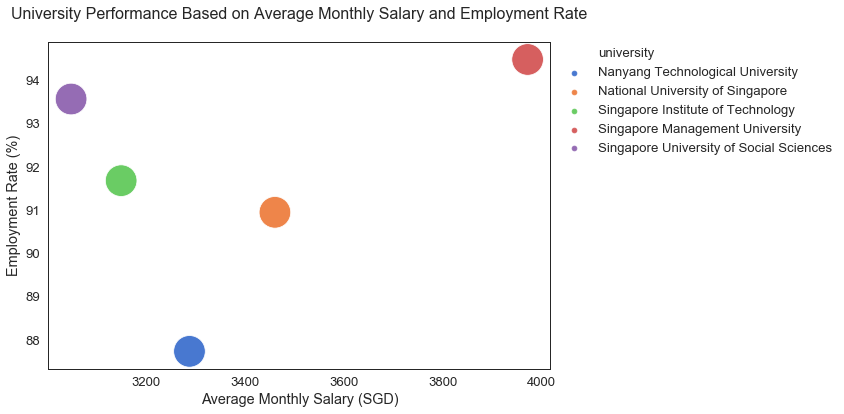

In [ ]:
#aggregating data for plot

rankvizdf = df_empsurvey.pivot_table(values=['basic_monthly_mean','employment_rate_overall'], index='university',aggfunc='mean')
rankvizdf.reset_index(inplace=True)

#plotting into bubble plot (3 variables)

plt.figure(figsize=(9,6))
sns.scatterplot(x="basic_monthly_mean", y="employment_rate_overall",
                hue="university",s=1000,palette="muted",
                data=rankvizdf)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Average Monthly Salary (SGD)")
plt.ylabel("Employment Rate (%)")
plt.title("University Performance Based on Average Monthly Salary and Employment Rate\n", fontsize=16)

The plot above serves as a "visual index" that enables one to rank and assess how universities fare in terms of average salary and employment rate combined. For example, SMU scores highest in both average monthly salary and employment rate, and thus has the highest joint ranking overall. NUS is rather balanced sitting in the middle for both variables. Gradautes from SIT and SUSS have high employment rates but the lowest salaries. NTU has the lowest employment rate, but comes in 3rd as far as mean monthly salaries are concerned. 

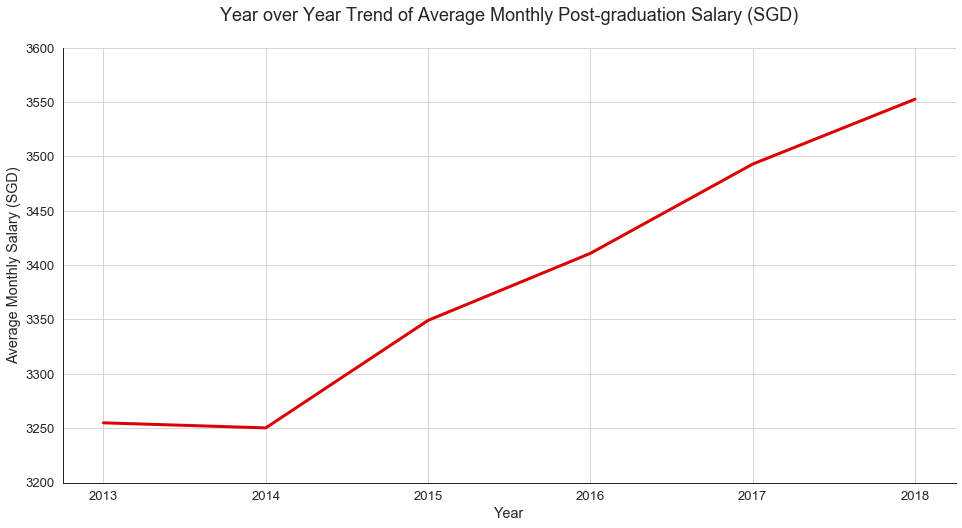

In [ ]:
sns.lineplot(data = df_empsurvey, y="basic_monthly_mean", x="year", color = "#dd0000", ci=None, linewidth=3)
sns.despine(left=False, bottom=False)
plt.title('Year over Year Trend of Average Monthly Post-graduation Salary (SGD)\n', fontsize=18)
plt.ylabel('Average Monthly Salary (SGD)')
plt.xlabel('Year')
plt.ylim((3200,3600))
plt.grid(True)

In terms of trends, the graph above illuminates the fact that the average post-graduation salary in Singapore has increased considerably from 2013 to 2018. In 2013, the average was around SGD 3250 and by 2018, this rapidly spiked to SGD 3500. Graduates are increasingly commanding higher salaries.

However, is this the case for all courses? The graph below shows the same trend broken down by course. This enables us to see promising courses where salaries are increasing and vice versa.

Text(0.5, 0.98, 'YoY Trend of Average Monthly Salary by Course')

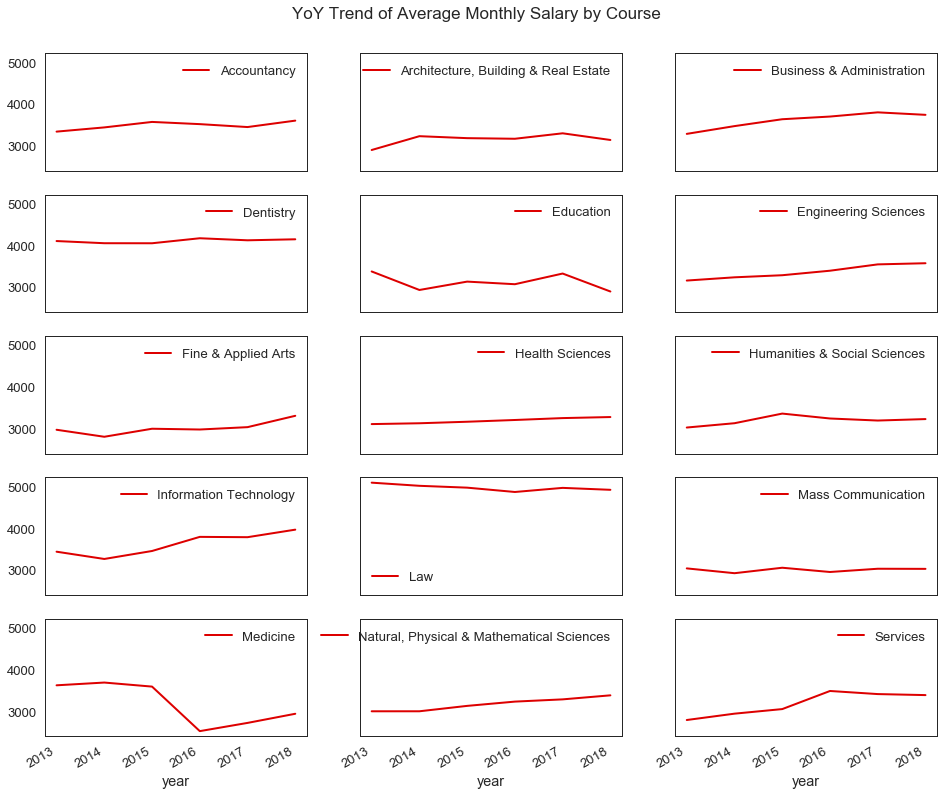

In [ ]:
df_empsurvey.pivot_table(
    values='basic_monthly_mean', index='year', columns="course",aggfunc='mean').plot(
    subplots=True, sharey=True, layout=(5,3), figsize=(16,13), linewidth=2, color="#dd0000") 
plt.subplots_adjust(top=0.93)
plt.suptitle('YoY Trend of Average Monthly Salary by Course', fontsize = 17)

From the chart above, it can be observed that salaries have been increasing over the last six years especially for IT, business, and engineering courses. The remaining courses have stayed stable or experienced slight growth with the exception of education and architecture, which are on a downtrend. 

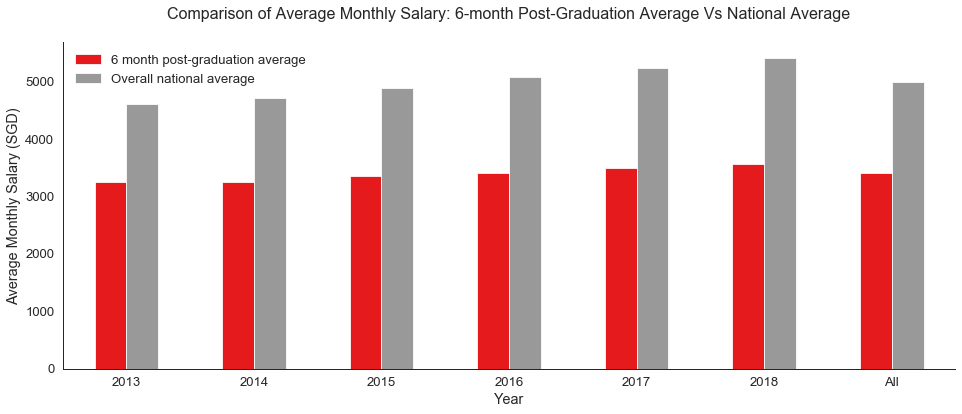

In [ ]:
#aggregating data

gradmean = df_empsurvey.pivot_table(values='basic_monthly_mean', index='year', aggfunc='mean', margins=True)
natmean = df_earnings[(df_earnings['year'] > 2012) & (df_earnings['year'] < 2019)].pivot_table(
          values='average_monthly_earnings', index='year', aggfunc='mean', margins=True)
bothmean = pd.merge(gradmean, natmean, on="year", how="left")
bothmean.rename(columns = {'basic_monthly_mean': '6 month post-graduation average',
                           'average_monthly_earnings': 'Overall national average'}, 
                            inplace = True)

#plotting data
ax = bothmean.plot(kind="bar", cmap="Set1", figsize=(16,6))
plt.title('Comparison of Average Monthly Salary: 6-month Post-Graduation Average Vs National Average\n', fontsize=16)
plt.ylabel('Average Monthly Salary (SGD)')
plt.xlabel('Year')
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

The chart above shows the comparison between average post graduation salaries versus the national average salaries from another dataset. It can be seen that the average monthly salary of fresh graduates is much lower than the national average. This is because of obvious reasons since the graduate employment survey is conducted on graduates six months after graduation whereas the national average salaries encompasses the entire working class.

Text(0.5, 0, 'Year')

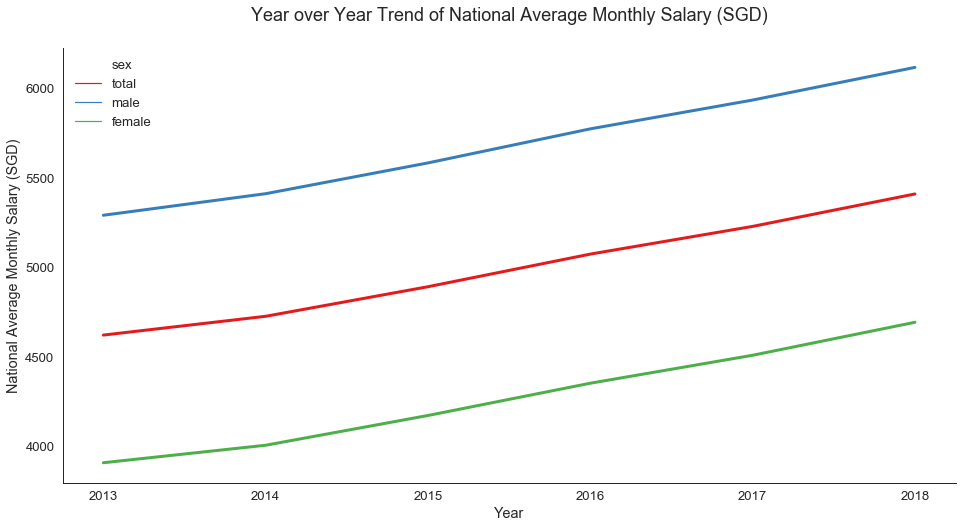

In [ ]:
sns.lineplot(data = df_earnings[(df_earnings['year'] > 2012) & (df_earnings['year'] < 2019)],
                    y="average_monthly_earnings", x="year", palette="Set1", hue="sex",ci=None, linewidth=3)
sns.despine(left=False, bottom=False)
plt.title('Year over Year Trend of National Average Monthly Salary (SGD)\n', fontsize=18)
plt.ylabel('National Average Monthly Salary (SGD)')
plt.xlabel('Year')

Looking at the national average monthly salary trend, it has certainly been increasing at a constant linear rate year over year. However, one thing to note here is that the average salary of males seems to be much higher than that of females.

It would be interesting to check if the difference is statistically significant:

<b> Upper-Tailed Hypothesis Test: </b>
 - Ho: The mean monthly earnings of males is equal to that of females.
 - Ha: The mean monthly earnings of males is higher than that of females.

In [ ]:
uppertailtest(earnings_male.average_monthly_earnings, earnings_female.average_monthly_earnings)

Upper-tailed Hypothesis Test Results: 

Statistic = 8.67202  P-Value = 1.90225e-15
Decision: Reject null hypothesis


The test reveals that there is enough evidence to conclude that males are paid more than females on average. According to Lim (2020), gender inequality remains to be a pressing issue in Singapore. It is one of those areas where Singapore's society is still relatively traditional. The inference from the hypothesis test indeed validates this notion.

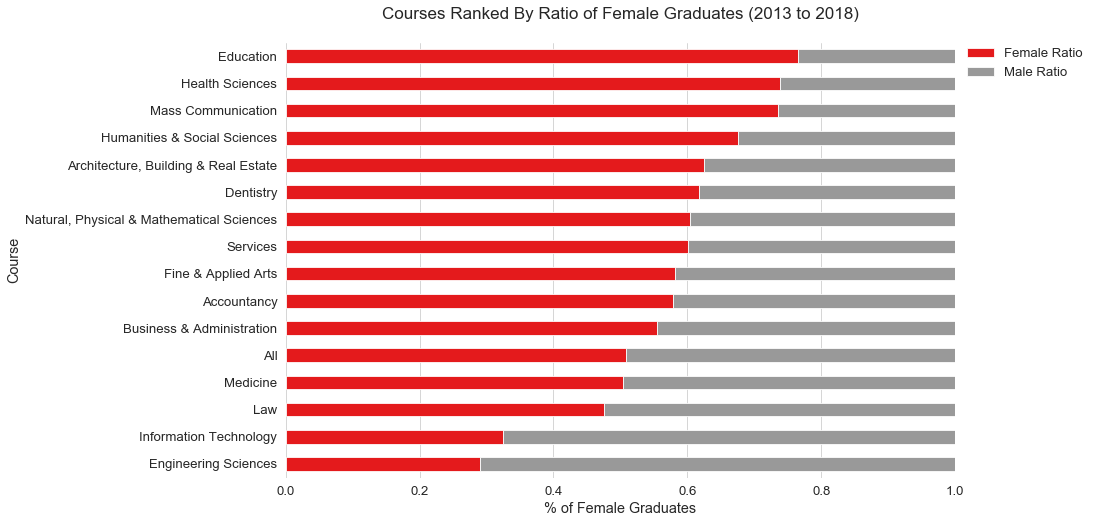

In [ ]:
#aggregating and transforming data for plot

gradbysex = df_uni[df_uni['year']>2012].pivot_table(
            values='graduates', 
            index=['course'], 
            columns=['sex'],
            aggfunc='sum', 
            margins=True)
gradbysex['M']=gradbysex['MF']-gradbysex['F']
gradbysex['Female Ratio']=gradbysex['F']/gradbysex['MF']
gradbysex['Male Ratio']=gradbysex['M']/gradbysex['MF']
femalepv = gradbysex[['Female Ratio','Male Ratio']]

#plotting data

ax = femalepv.sort_values(by=['Female Ratio'], ascending=True).plot(
         kind="barh", 
         figsize=(12,8), 
         stacked=True, 
         cmap="Set1", 
         legend=True)
plt.title('Courses Ranked By Ratio of Female Graduates (2013 to 2018)\n', fontsize=17)
plt.ylabel('Course')
plt.xlabel('% of Female Graduates')
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1.01,1),borderaxespad=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(True)

Under the same theme of gender analysis, the chart above helps to answer the question of whether there are courses over or under represented by females. As evident in the fifth bar from the bottom named "All", the overall ratio of females:males is 50:50 across courses. All the bars above this have a higher proportion of females while the bars below it have a smaller proportion. 
        
The ratio of males exceeds females in only four courses: Medicine, Law, IT, and Engineering. Females are particualrly overrepresented in education, health sciences, and mass communication. 

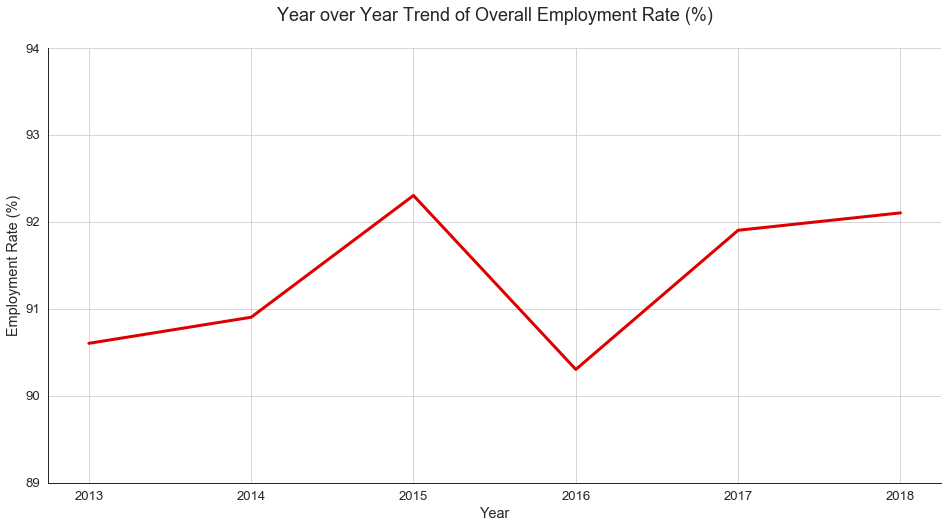

In [ ]:
sns.lineplot(data = df_empsurvey, y="employment_rate_overall", x="year", estimator="median", color = "#dd0000", ci=None, linewidth=3)
sns.despine(left=False, bottom=False)
plt.title('Year over Year Trend of Overall Employment Rate (%)\n', fontsize=18)
plt.ylabel('Employment Rate (%)')
plt.xlabel('Year')
plt.ylim((89,94))
plt.grid(True)

As far as the employment rate trend is concerned, it has remained fairly stable over the last six years - staying within the range of 90 - 92.5%. In fact, data from the last three years (2016 to 2018) indicate an uptrend in overall employment rates. 

Text(0.5, 0.98, 'YoY Trend of Employment Rate (%) by Course\n\n')

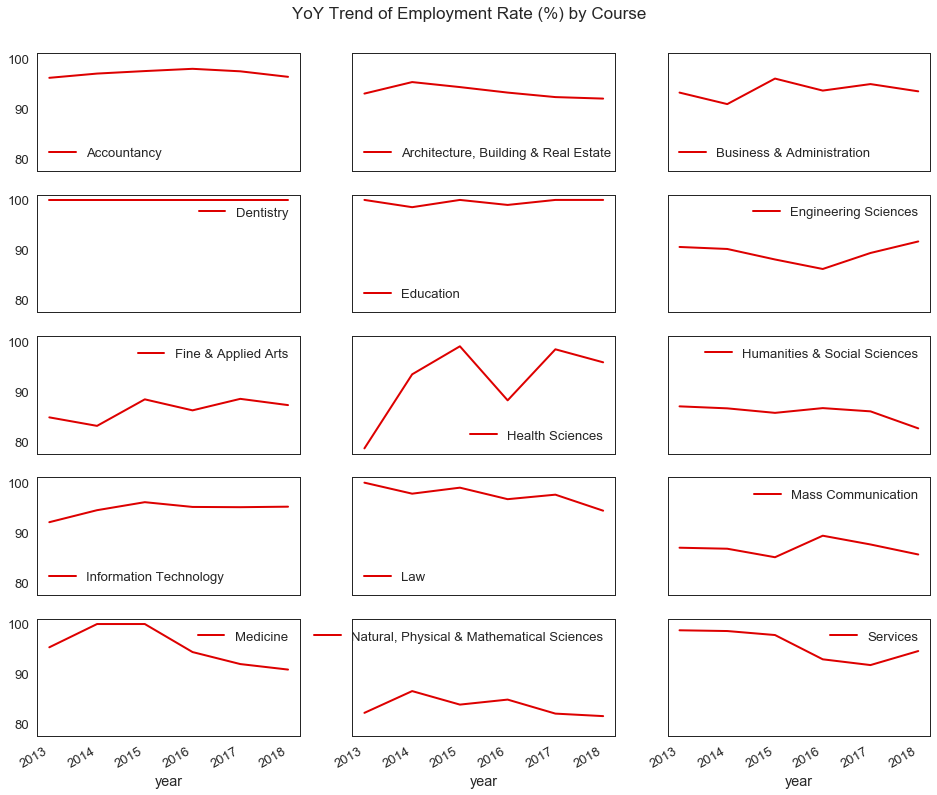

In [ ]:
df_empsurvey.pivot_table(
    values='employment_rate_overall', index='year', columns="course",aggfunc='median').plot(
    subplots=True, sharey=True, layout=(5,3), figsize=(16,13), color="#dd0000",linewidth=2)  
plt.subplots_adjust(top=0.93)
plt.suptitle('YoY Trend of Employment Rate (%) by Course\n\n', fontsize = 17)

It would be meaningful to examine the trends of courses where employment rates are changing. Summarizing the chart above:
    
Courses with increasing employment rates (2013 - 2018)

 - Engineering Sciences
 - Fine & Applied Arts
 - Information Technology
 - Health Sciences (large variation)
 
Courses with decreasing employment rates (2013 - 2018)

 - Medicine
 - Natural, Physical, & Mathematical Sciences
 - Services
 - Law
 - Humanities and Social Sciences
 - Architecture, Building, and Real Estate
 
Courses with stable employment rates (2013 - 2018)

 - Accountancy
 - Business & Administration
 - Dentistry
 - Education
 - Mass Communication
 
It is important to emphasize that the movement in the trend is within a small range and all the courses still have employment rates of over 80% - which is promising.

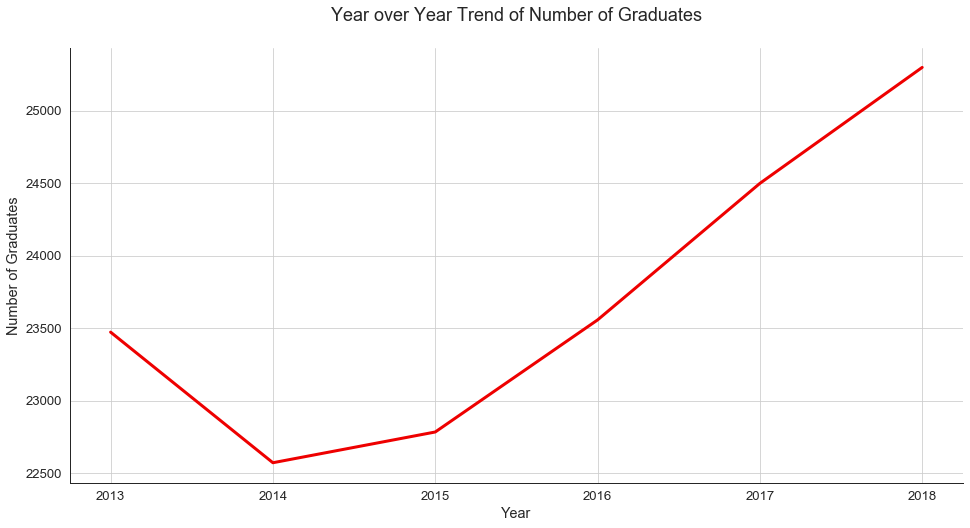

In [ ]:
sns.lineplot(data = df_uni[(df_uni['year'] > 2012) & (df_uni['year'] < 2019)],
                    y="graduates", x="year", color="#ee0000",estimator='sum',ci=None, linewidth=3)
sns.despine(left=False, bottom=False)
plt.title('Year over Year Trend of Number of Graduates\n', fontsize=18)
plt.ylabel('Number of Graduates')
plt.xlabel('Year')
plt.grid(True)

The chart above shows the trend of the number of graduates produced over the years. Clearly, the supply of graduates into the job market has been increasing. As the number of graduates increases, so does the competition, especially if the number of jobs created does not increase at the same rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

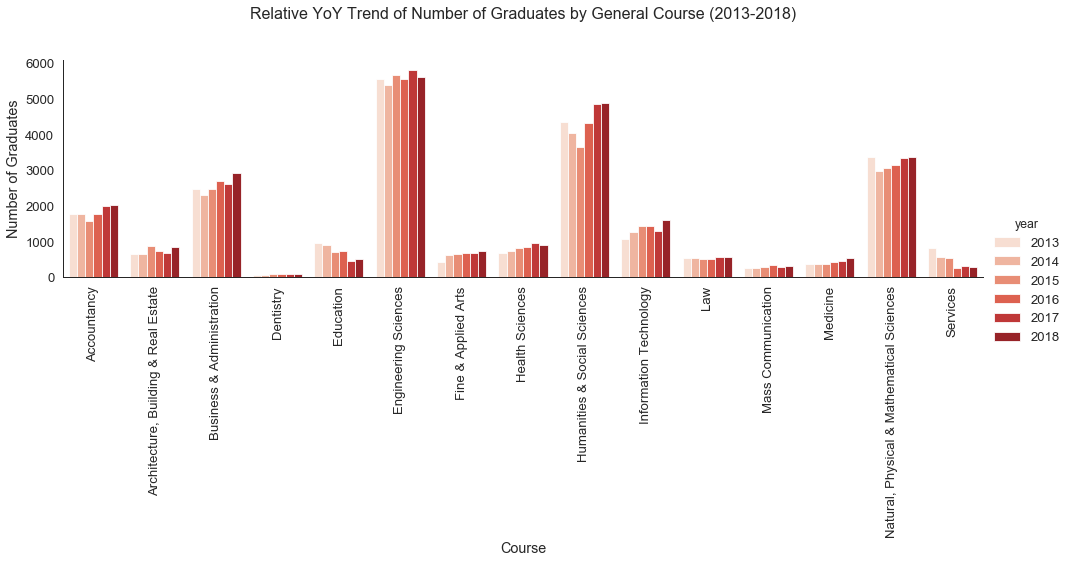

In [ ]:
plot = sns.catplot(x="course", y="graduates", estimator=np.sum, data=df_uni[df_uni['year']>2012],
                   height=4, aspect=3.5/1, kind="bar", palette="Reds", hue="year",
                   orient = "v", color = "#dd0000", ci=None)
plt.xlabel("Course")
plt.ylabel("Number of Graduates")
plt.title("Relative YoY Trend of Number of Graduates by General Course (2013-2018)\n\n", size=16)
plt.xticks(rotation=90)

The chart above gives a a better picture of the number of graduates produced for each course as well as the YoY trend of the same. Engineering Sciences, Humanities and Social Sciences, and Natural, Physical, & Mathematical Sciences, have the most number of graduates compared to the rest. In terms of trends, the bars generally indicate an uptrend which is consistent with the overall trend. However, the number of graduates for Education and Services seems to be decreasing year over year. 

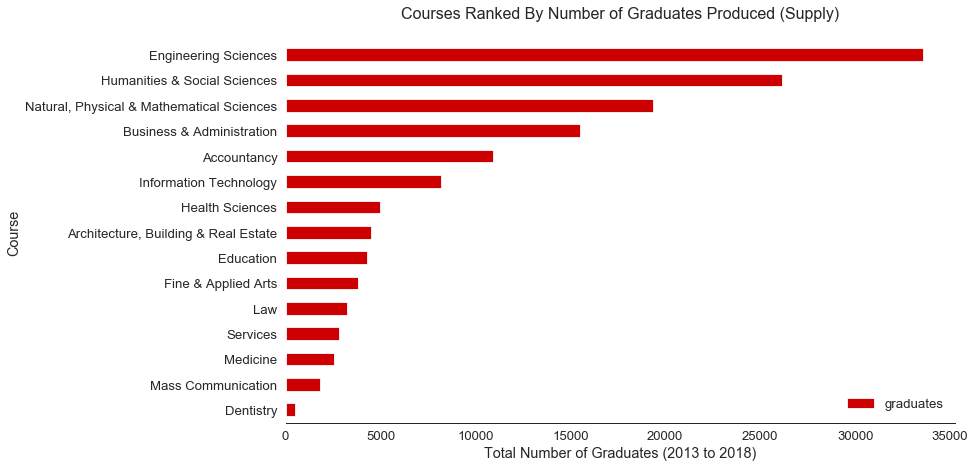

In [ ]:
ax = df_uni[df_uni['year']>2012].pivot_table(
    values='graduates', 
    index=['course'], aggfunc='sum').sort_values(
    by = ['graduates'],ascending=True).plot(kind="barh", color="#cc0000", figsize=(12,7))
plt.title('Courses Ranked By Number of Graduates Produced (Supply)\n', fontsize=16)
plt.ylabel('Course')
plt.xlabel('Total Number of Graduates (2013 to 2018)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

The ranked bar graph shows that the number of graduates produced per course varies greatly from course to course. 

Next, the association between number of graduates, employment rates, and average salaries is explored through a bubble chart.

Text(0.5, 1.0, 'Graduates (x), Employment Rate(y), and Average Monthly Salary (size) by Course (color)\n')

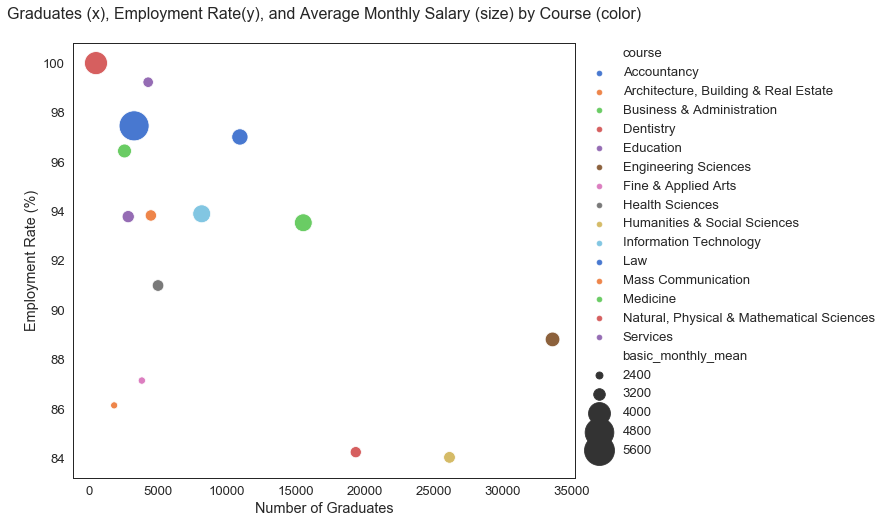

In [ ]:
#aggregating data for plot

pva = df_uni[df_uni['year']>2012].pivot_table(values='graduates', index='course',aggfunc='sum')
pvb = df_empsurvey.pivot_table(values=['basic_monthly_mean','employment_rate_overall'], index='course',aggfunc='mean')
pvm = pd.merge(pva,pvb, on="course")
pvm.reset_index(inplace=True)

#plotting into bubble plot (4 variables)

plt.figure(figsize=(9,8))
sns.scatterplot(x="graduates", 
                y="employment_rate_overall",
                size="basic_monthly_mean",
                hue="course",
                sizes=(50,900),
                palette="muted",
                data=pvm)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Number of Graduates")
plt.ylabel("Employment Rate (%)")
plt.title("Graduates (x), Employment Rate(y), and Average Monthly Salary (size) by Course (color)\n", fontsize=16)

The above chart is powerful as it encompasses four variables in a single visualization. For example, the biggest bubble in blue represents "Law" which has the highest average salary, small number of graduates, and a high employment rate.

It is evident that there are no courses with a large number of graduates but high high employment rates. Generally courses with high employment rates have a small number of graduates. This makes sense since a large number of graduates means higher competition. A correlation between two would help explain this further.

In [ ]:
#aggregating number of graduates and employment rates from 2013 to 2018

gradpiv = df_uni[df_uni['year']>2012].pivot_table(values='graduates', 
                index=['course'], aggfunc='sum')
emppiv = df_empsurvey.pivot_table(values='employment_rate_overall', 
                index=['course'], aggfunc='median')
grad_emp = pd.merge(gradpiv, emppiv, on="course")
grad_emp

,graduates,employment_rate_overall
course,,
Accountancy,10927,97.30
"Architecture, Building & Real Estate",4475,93.85
Business & Administration,15524,93.50
Dentistry,495,100.00
Education,4277,100.00
Engineering Sciences,33593,89.50
Fine & Applied Arts,3820,87.50
Health Sciences,4993,96.10
Humanities & Social Sciences,26123,85.70


Text(0.5, 1, 'Number of Graduates vs Employment Rate from 2013-2018 (Points = Course)\n')

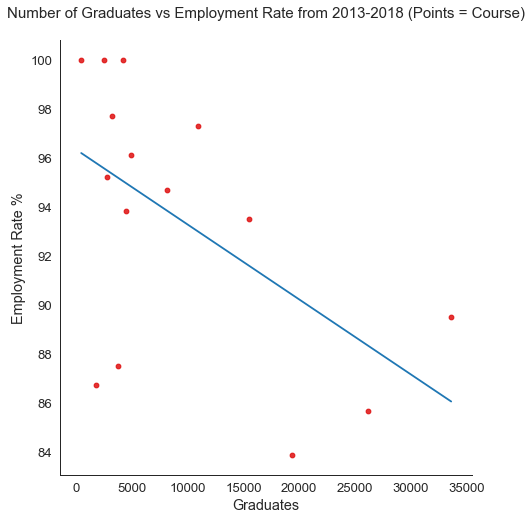

In [ ]:
#plotting into correlation scatter plot

sns.lmplot(x='graduates', y='employment_rate_overall', 
           data=grad_emp, height=7, aspect=1, ci=None,
           scatter_kws={'linewidth':1,'color':'#dd0000'})
plt.xlabel("Graduates")
plt.ylabel("Employment Rate %")
plt.title("Number of Graduates vs Employment Rate from 2013-2018 (Points = Course)\n", size=15)

In [ ]:
linreg(grad_emp['graduates'], grad_emp['employment_rate_overall'])

Linear regression output: 

Equation: y = -0.0003059071022225377 x  +  96.34621733198642 
Correlation coefficient (r):  -0.5521972062161105 
p-value 0.03280854005826846 
Standard error: 0.00012809746254330837


Regressing the number of graduates with employment rates, there appears to be moderate inverse correlation. The correlation coefficent of -0.55 signifies a negative moderate correlation. The p-value of 0.0328 is conclusive as it is below 0.05.

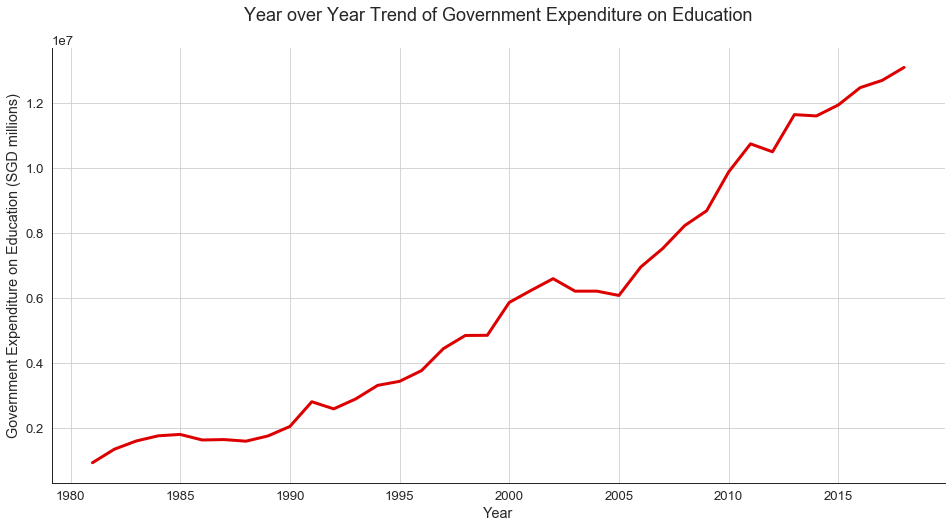

In [ ]:
sns.lineplot(data = df_govtexp, y="total_expenditure_on_education", x="year", color = "#dd0000", linewidth=3)
sns.despine(left=False, bottom=False)
plt.title('Year over Year Trend of Government Expenditure on Education\n', fontsize=18)
plt.ylabel('Government Expenditure on Education (SGD millions)')
plt.xlabel('Year')
plt.grid(True)

One of the key drivers of Singapore's continued success over the years is its continued investnment in education. The trends and numbers show and support this as well. From the graph above, a sharp uptrend is seen year over year in the total government expenditure on education. In fact, the budget has increased six-fold in a span of 35 years. 

It would be insightful to see if there is any correlation between the total government expenditure and the total university student intake. 

In [ ]:
#aggregating student intake and government expenditure on education by year

intakepiv = df_uni.pivot_table(values='intake', index='year', aggfunc='sum')
intakeexp = pd.merge(intakepiv, df_govtexp, on="year", how="left")
intakeexp

,year,intake,total_expenditure_on_education
0,2005,18785,6082278
1,2006,20592,6959285
2,2007,22041,7527668
3,2008,21515,8229694
4,2009,22958,8685056
5,2010,22363,9875445
6,2011,23499,10740250
7,2012,24639,10496911
8,2013,26186,11638313
9,2014,26871,11598458


Correlation:  0.9593735796813193


Text(0.5, 1, 'Government Expenditure on Education vs Total University Intake\n')

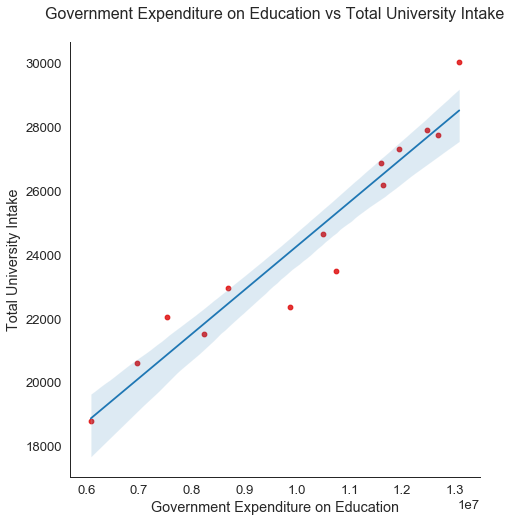

In [ ]:
#plotting into regression plot

sns.lmplot(y='intake', x='total_expenditure_on_education', 
           data=intakeexp, height=7, aspect=1, ci=95,
           scatter_kws={'linewidth':1,'color':'#dd0000'})
print("Correlation: ", intakeexp['total_expenditure_on_education'].corr(intakeexp['intake']))
plt.xlabel("Government Expenditure on Education")
plt.ylabel("Total University Intake")
plt.title("Government Expenditure on Education vs Total University Intake\n", size=16)

In [ ]:
linreg(intakeexp['total_expenditure_on_education'], intakeexp['intake'])

Linear regression output: 

Equation: y = 0.0013771730925008936 x  +  10490.636424155196 
Correlation coefficient (r):  0.9593735796813192 
p-value 5.946078242566457e-08 
Standard error: 0.00011691575919303845


Based on the regression output, there appears to be a very strong correlation between government expenditure on education and university intake as evidenced by the high correlation coefficient of 0.96 and near-zero p-value. This is not to say that there is necessarily causation here as there could be other latent variables involved, but a strong correlation of this sort nonetheless illuminates a promising association between the two variables.

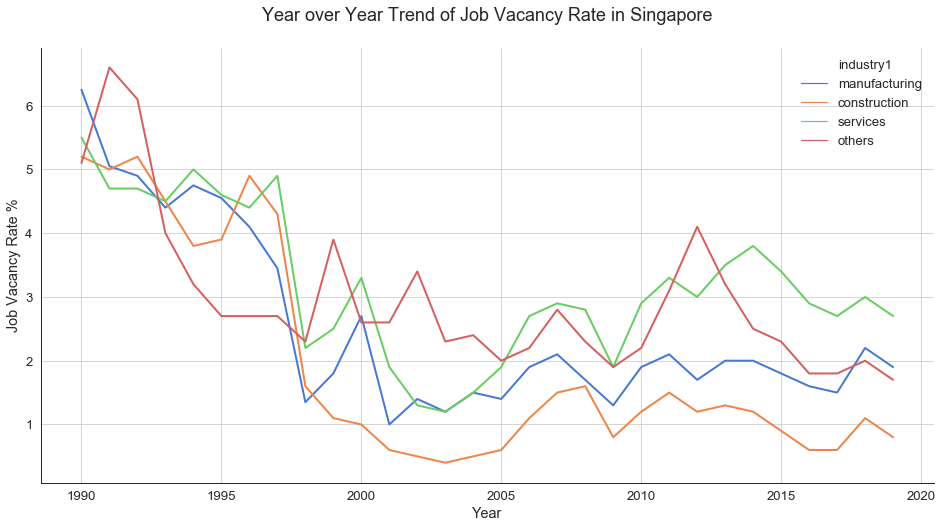

In [ ]:
sns.lineplot(data = df_jobvac, 
             y="job_vacancy_rate", 
             x="year", 
             palette="muted", 
             linewidth=2, 
             hue="industry1",
             estimator="median",
             ci=None)
sns.despine(left=False, bottom=False)
plt.title('Year over Year Trend of Job Vacancy Rate in Singapore\n', fontsize=18)
plt.ylabel('Job Vacancy Rate %')
plt.xlabel('Year')
plt.grid(True)

One byproduct of rapid economic growth is heighted competition. The downtrend in job vacancy rates over the years emphasizes this. A similar trend is observed across the different high-level industries. In general, the services sector has the highest job vacancy rate, followed by others, manufacturing, and lastly construction. 

With the number of graduates increasing and the job vacancy rates decreasing, it makes sense why graduates in Singapore are increasingly concerned about employment and heightened competition. 

(-20000, 140000)

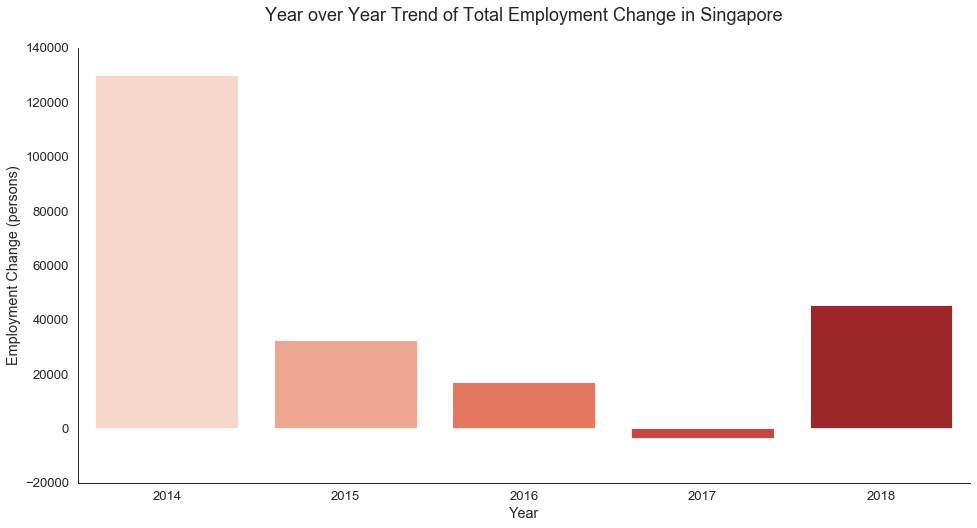

In [ ]:
sns.barplot(data = df_empdelta[(df_empdelta['year'] > 2013) & (df_empdelta['year'] < 2019)], 
            y=" Total Changes In Employment ", x="year", palette="Reds")
sns.despine(left=False, bottom=False)
plt.title('Year over Year Trend of Total Employment Change in Singapore\n', fontsize=18)
plt.ylabel('Employment Change (persons)')
plt.xlabel('Year')
plt.ylim((-20000,140000))

The trend of employment change over the years paints a similar picture to the downtrend in job vacancies. The net change in employment (delta) over the years is decreasing.

In order to see how job supply and demand match, it would be a good proxy to see the relationship between number of graduates and job vacancy rates.

In [ ]:
#aggregating number of graduates and employment rates from 2013 to 2018

gradpiv = df_uni.pivot_table(values='graduates', 
                index=['year'], aggfunc='sum')
jobpiv = df_jobvac[df_jobvac['year']>2004].pivot_table(values='job_vacancy_rate', 
                index=['year'], aggfunc='median')
grad_job = pd.merge(gradpiv, jobpiv, on="year")
grad_job

,graduates,job_vacancy_rate
year,,
2005,15361,1.70
2006,15855,2.45
2007,16741,2.75
2008,17426,2.50
2009,18091,1.55
2010,18665,2.50
2011,20510,3.05
2012,20723,2.65
2013,23472,2.90


Text(0.5, 1, 'Number of Graduates vs Job Vacancy Rate\n')

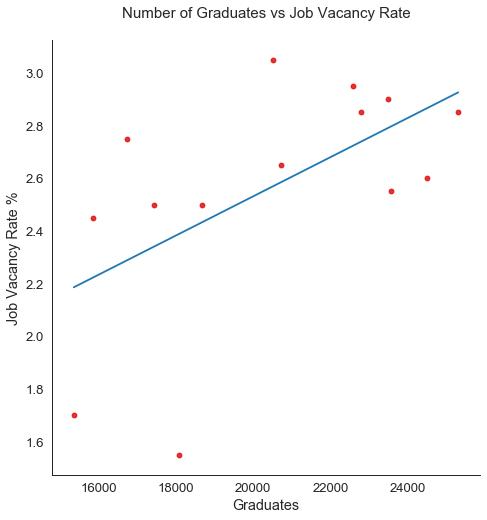

In [ ]:
#plotting into correlation scatter plot

sns.lmplot(x='graduates', y='job_vacancy_rate', 
           data=grad_job, height=7, aspect=1, ci=None,
           scatter_kws={'linewidth':1,'color':'#dd0000'})
plt.xlabel("Graduates")
plt.ylabel("Job Vacancy Rate %")
plt.title("Number of Graduates vs Job Vacancy Rate\n", size=15)

In [ ]:
linreg(grad_job['graduates'], grad_job['job_vacancy_rate'] )

Linear regression output: 

Equation: y = 7.447368435701002e-05 x  +  1.0417171022754133 
Correlation coefficient (r):  0.5715782730372123 
p-value 0.03273132091282174 
Standard error: 3.086315049870399e-05


The regression results show a moderate positive correlation between the number of graduates and job vacancy rates.

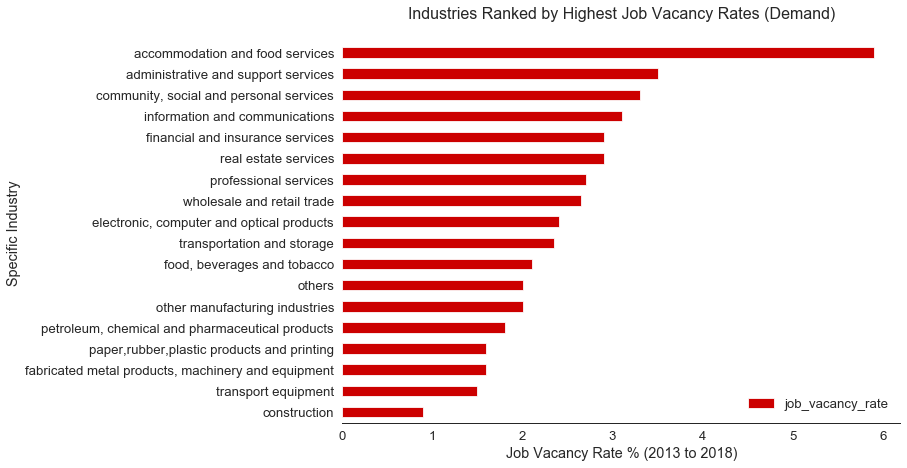

In [ ]:
ax = df_jobvac[df_jobvac['year']>2012].pivot_table(
    values='job_vacancy_rate', 
    index=['industry2'], aggfunc='median').sort_values(
    by = ['job_vacancy_rate'],ascending=True).plot(kind="barh",color="#cc0000", figsize=(10,7))
plt.title('Industries Ranked by Highest Job Vacancy Rates (Demand)\n', fontsize=16)
plt.ylabel('Specific Industry')
plt.xlabel('Job Vacancy Rate % (2013 to 2018)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

Finally, it would be meaningful for students and graduates to look at industries with high job vacancy rates (%) and perhaps target these industries by selecting courses related to them. The ranked bar graph above shows the various job industries in Singapore ranked according to job vacancy rates. 

## - Key Takeaways and Conclusions

The following key findings can be inferred from the analyses:

- SMU graduates command the highest salaries and have the highest employment rates overall.
- There is a statistically significant difference among the different universities for the average monthly salaries of graduates. 
- Graduates from the big three universities (NUS, SMU, NTU) command higher average salaries than other universities.
- Medicine, Dentistry, Education, Law, and Accountancy have the highest employment rates overall.
- Law, Dentistry, IT, and Business courses have the highest average monthly salaries. 
- National average salaries for males were higher than that of females based on EDA and statistical tests. Gender inequality in terms of compensation continues to be a pressing issue in Singapore.
- Females were overrepresented in education, health sciences, and mass communication and underrepresented in medicine, law, IT, and engineering.
- There is a strong positive correlation between government expenditure on education and the total university intake. Government expenditure on education has been a key driver of economic success in Singapore.
- Job vacancy rates in Singapore are declining while the number of university graduates is increasing every year. This implies increasing competition for jobs.

Owing to the government's generous investments into education, Singapore's tertiary education system has been a key success driver for economic progress in the country. As the country's economy continues to evolve and transform, university courses have to keep pace with the changing job requirements and vacancies across different industries. With the number of graduates rapidly increasing every year and job vacancy rates dropping, it is inevitable that the job market will continue to become more competitive. As such, students must focus on developing high-value skills and prioritize degrees and courses that coincide with the requirements of the knowledge economy. Singapore is home to world-class universities - each specializing in certain courses and have varying empoyability prospects for different courses. The degree to which graduates and employers leverage the strengths of these universities would impact the bridge between university education and the job market - and ultimately economic progress.


## - References

Chan, M., Koh, E., Tan, J., Costes-Onishi, P., Hung, D. (2017). Advancing 21st Century Competencies in Singapore. Asia Society Center for Global Education. Retrieved from: https://asiasociety.org/sites/default/files/2017-10/advancing-21st-century-competencies-in-singapore.pdf

Data.gov.sg (2020). Average (Mean) Monthly Nominal Earnings Per Employee By Sex, Quarterly. Retrieved from: https://data.gov.sg/dataset/average-monthly-nominal-earnings-per-employee-by-sex-quarterly

Data.gov.sg (2020). Government Total Expenditure on Education. Retrieved from: https://data.gov.sg/dataset/government-expenditure-on-education

Data.gov.sg (2020). Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD. Retrieved from: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd?resource_id=9326ca53-9153-4a9c-b93f-8ae032637b70

Data.gov.sg (2020). Job Vacancy Rate by Industry and Occupational Group, Annual. Retrieved from: https://data.gov.sg/dataset/job-vacancy-rate-by-industry-and-occupational-group-annual?resource_id=1682ddec-0199-4ec2-9f3c-33fc4040e25f

Data.gov.sg (2020). Universities - Intake, Enrolment and Graduates by Course. Retrieved from: https://data.gov.sg/dataset/universities-intake-enrolment-and-graduates-by-course
 
Department of Statistics Singapore (2020). Changes In Employment By Sector, (Compared To The Previous Period), Annual. Retrieved from: https://www.tablebuilder.singstat.gov.sg/

EHL. (2019). Singapore: The Reasons Behind Its Economic Success. EHL Insights. Retrieved from: https://hospitalityinsights.ehl.edu/singapore-economic-success

IMD. (2019). IMD World Competitiveness Ranking 2019. Retrieved from: https://www.imd.org/news/updates/singapore-topples-united-states-as-worlds-most-competitive-economy/

Lim, J. (2020). The Big Read: Gender equality in Singapore remains elusive amid entrenched attitudes about women’s roles. Retrieved from: https://www.channelnewsasia.com/news/singapore/the-big-read-singapore-gender-equality-women-roles-13193956

Romano, V. (2020). The Singapore Job Market: 2020 Outlook. Eliott Scott HR Recruitment. Retrieved from: https://www.elliottscotthr.com/blog/2020/01/singapore-job-market-outlook-2020

Scipy.org (2020). Testing for normal distribution - Scipy documentation. Retrieved from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

Tjin, T.P. (2019). The 28 Most Important Issues Facing Singapore. New Naratif. Retrieved from: https://newnaratif.com/research/the-28-most-important-issues-facing-singapore/

UniRank (2019). Oldest Universities in Singapore by Foundation Year. Retrieved from: https://www.4icu.org/sg/oldest/

Yiannouka, S. (2015). Is education the secret of Singapore's success. World Economic Forum. Retrieved from: https://www.weforum.org/agenda/2015/04/is-education-the-secret-to-singapores-success/

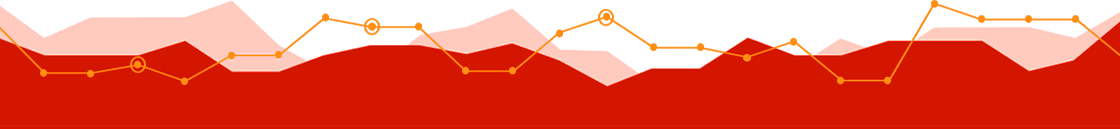